In [4]:
# Assignment 2
# Name : Adarsh Pathak
# NUID : 002830444

##Building a model that predicts whether a passenger on the Titanic survived or not.

**Columns**

**PassengerId**: Passenget Id is their identity

**Survived**: Survived or not

**Pclass**: Passenger class

**SibSp**: Sibling spouse

**Parch**: Parent child

**Fare**: Price of ticket

**Age_mean**: Age of passenger

**Embarked_Column_Q**: City name

**Embarked_Column_S**: City name

**Sex_M**: Sex of passenger

In [5]:

##Installing all the required libraries for the Assignment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Install Python packages from PyPI using pip.
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [7]:
#install latest version of h20
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=6ca870810e50f5987a0b712138b04d697c52a8e3dc7eb4f534ea2dc8817db450
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [8]:
!pip install yellowbrick

In [9]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import os
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [10]:
# Setting up maximum runtime for the AutoML
min_mem_size=6
run_time=222

In [11]:
# Define the percentage of available memory to use.
pct_memory=0.5

# Call psutil's virtual_memory() function to retrieve the current system's virtual memory information.
virtual_memory=psutil.virtual_memory()

# Calculate the minimum memory size (in GB) that should be allocated for the H2O cluster.
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))

In [12]:
# Start the H2O server on a random port
import random
import logging
import sys
import h2o

# Generate a random port number
port_no = random.randint(5555, 55555)

try:
    # Start H2O cluster
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except Exception as e:
    logging.critical('Failed to initialize H2O cluster: %s', str(e))
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:29483..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpetr6q8ig
  JVM stdout: /tmp/tmpetr6q8ig/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpetr6q8ig/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:29483
Connecting to H2O server at http://127.0.0.1:29483 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_e771j4
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:29483
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [15]:
# Import the data using H2O.ai
url = 'https://raw.githubusercontent.com/adpathak07/DataScienceAssignment1/main/Titanic-Dataset.csv?token=GHSAT0AAAAAACM4KELQ46WNLNV6AL3ZH446ZOUEXKA'
df = pd.read_csv(url)
data = h2o.import_file(path=url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
# checking top rows for quick overview
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [17]:
# dropping columns
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       ...  
886        S  
887        S  
888        S  
889        C  
890        Q  

[891 rows x 9 columns]

In [18]:
# checking empty rows
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [19]:
# filling age (numerical column) with mean
mean_age = df['Age'].mean()

# filling age column
df['Age_mean'] = df['Age'].fillna(mean_age)

In [20]:
# fill using categorical column
mode_value = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_value, inplace=True)

In [21]:
# checking if Age_mean added
df.head()

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

  Embarked  Age_mean  
0        S      22.0  
1        C      38.0  
2        S      26.0  
3        S      35.0  
4        S      35.0

In [22]:
# dropping age for extra column
df.drop(columns=['Age'], inplace=True)

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_mean       0
dtype: int64

In [24]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

##Handling categorical column

In [26]:
# applying oneHotEncoder
ohe = OneHotEncoder(drop='first', sparse = False, dtype=np.int32)
cols_to_ohe = df[['Embarked']]
encoded_data = ohe.fit_transform(cols_to_ohe)

#creating data frame for encoded data
df_encoded = pd.DataFrame(encoded_data, columns=["Embarked_Column_Q", "Embarked_Column_S"])

#join the encoded column to main dataframe
df = pd.concat([df, df_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
# applying oneHotEncoder to sex column
ohe = OneHotEncoder(drop='first', sparse = False, dtype=np.int32)
cols_to_ohe = df[['Sex']]
encoded_data = ohe.fit_transform(cols_to_ohe)

#creating data frame for encoded data
df_encoded = pd.DataFrame(encoded_data, columns=["Sex_M"])

#join the encoded column to main dataframe
df = pd.concat([df, df_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
df.head()

PassengerId  Survived  Pclass     Sex  SibSp  Parch     Fare Embarked  \
0            1         0       3    male      1      0   7.2500        S   
1            2         1       1  female      1      0  71.2833        C   
2            3         1       3  female      0      0   7.9250        S   
3            4         1       1  female      1      0  53.1000        S   
4            5         0       3    male      0      0   8.0500        S   

   Age_mean  Embarked_Column_Q  Embarked_Column_S  Sex_M  
0      22.0                  0                  1      1  
1      38.0                  0                  0      0  
2      26.0                  0                  1      0  
3      35.0                  0                  1      0  
4      35.0                  0                  1      1

In [29]:
#dropping Sex and Embarked as it was extra
df.drop(columns=['Sex', 'Embarked'], inplace=True)

In [30]:
df.head()

PassengerId  Survived  Pclass  SibSp  Parch     Fare  Age_mean  \
0            1         0       3      1      0   7.2500      22.0   
1            2         1       1      1      0  71.2833      38.0   
2            3         1       3      0      0   7.9250      26.0   
3            4         1       1      1      0  53.1000      35.0   
4            5         0       3      0      0   8.0500      35.0   

   Embarked_Column_Q  Embarked_Column_S  Sex_M  
0                  0                  1      1  
1                  0                  0      0  
2                  0                  1      0  
3                  0                  1      0  
4                  0                  1      1

#Exploratory data analysis

In [31]:
# Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   SibSp              891 non-null    int64  
 4   Parch              891 non-null    int64  
 5   Fare               891 non-null    float64
 6   Age_mean           891 non-null    float64
 7   Embarked_Column_Q  891 non-null    int32  
 8   Embarked_Column_S  891 non-null    int32  
 9   Sex_M              891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


In [32]:
# Obtaining the size (rows and column) of the DataFrame
df.shape

(891, 10)

In [33]:
# Name of all predictors and resultant columns
columns = list(df.columns)
print(columns)

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_mean', 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M']


In [34]:
# description of dataset
df.describe()

PassengerId    Survived      Pclass       SibSp       Parch  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.523008    0.381594   
std     257.353842    0.486592    0.836071    1.102743    0.806057   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     223.500000    0.000000    2.000000    0.000000    0.000000   
50%     446.000000    0.000000    3.000000    0.000000    0.000000   
75%     668.500000    1.000000    3.000000    1.000000    0.000000   
max     891.000000    1.000000    3.000000    8.000000    6.000000   

             Fare    Age_mean  Embarked_Column_Q  Embarked_Column_S  \
count  891.000000  891.000000         891.000000         891.000000   
mean    32.204208   29.699118           0.086420           0.725028   
std     49.693429   13.002015           0.281141           0.446751   
min      0.000000    0.420000           0.000000           0.000000   
25%      7.910400   22.000000           0.000000           0.000000   
50%     14.454200   29.699118           0.000000           1.000000   
75%     31.000000   35.000000           0.000000           1.000000   
max    512.329200   80.000000           1.000000           1.000000   

            Sex_M  
count  891.000000  
mean     0.647587  
std      0.477990  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

This is a statistical summary of our DataFrame, and the output shows various statistics for each column in our dataset.

For example,

- The 25th percentile (Q1) for the Survived column is 0, meaning that 25% of the data has a Survived value of 0.
- The maximum value in the Age column is 80, which is the highest age in our dataset.

and so on.


This information is essential for understanding the characteristics of the dataset, including the central tendency (mean), spread (standard deviation), and the range of values. It's particularly useful for identifying outliers and gaining insights into the distribution of data, which can help in building and selecting appropriate machine learning models for predicting Survival rate.

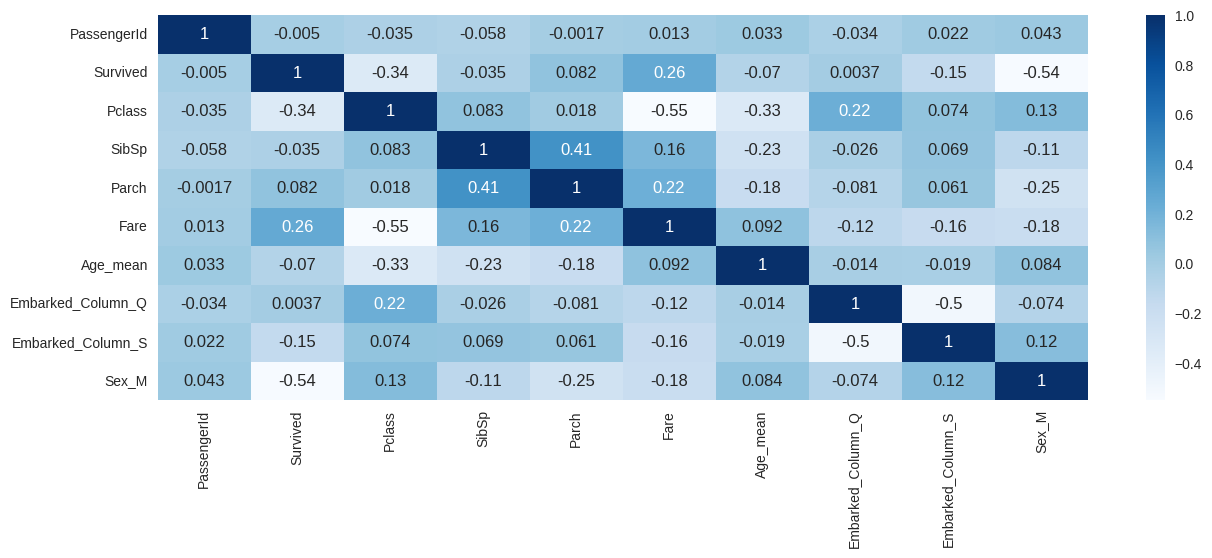

In [35]:
# making heatmap
plt.figure(figsize=(15,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()

The correlation heatmap offers a graphical representation of the interrelationships among different attributes present in the dataset. It manifests as a color-coded matrix, depicting the degree of correlation between pairs of variables.

Within the heatmap, each attribute appears on both the horizontal and vertical axes, while the color of each cell denotes the intensity of correlation between the respective pair of attributes. The color gradient spans from lighter hues (like light blue) representing weak correlation to darker tones (such as dark blue) indicating strong correlation.

This heatmap proves invaluable for uncovering insights within the dataset. It facilitates the recognition of patterns and tendencies, highlighting attributes with significant correlations, whether positive or negative. Such insights are particularly beneficial during exploratory data analysis and can aid in the identification of potential predictor variables for statistical modeling purposes.





Key observations from the correlation map above:

- It's evident from the heatmap that the majority of variables exhibit little dependence on each other.
- The degree of collinearity is notably below 0.1 for the majority of variables.

In [43]:
# Transformed a Pandas DataFrame into an H2O DataFrame to facilitate further processing with AutoML.

h2o_df = h2o.H2OFrame(
    df
)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This process is essential because H2O employs its specialized data structure optimized for efficient machine learning tasks. Converting our data into an H2O DataFrame enables us to utilize H2O's AutoML, which automates the creation and evaluation of machine learning models, reducing the need for manual parameter adjustments. This conversion proves valuable when engaging in predictive modeling tasks with H2O.

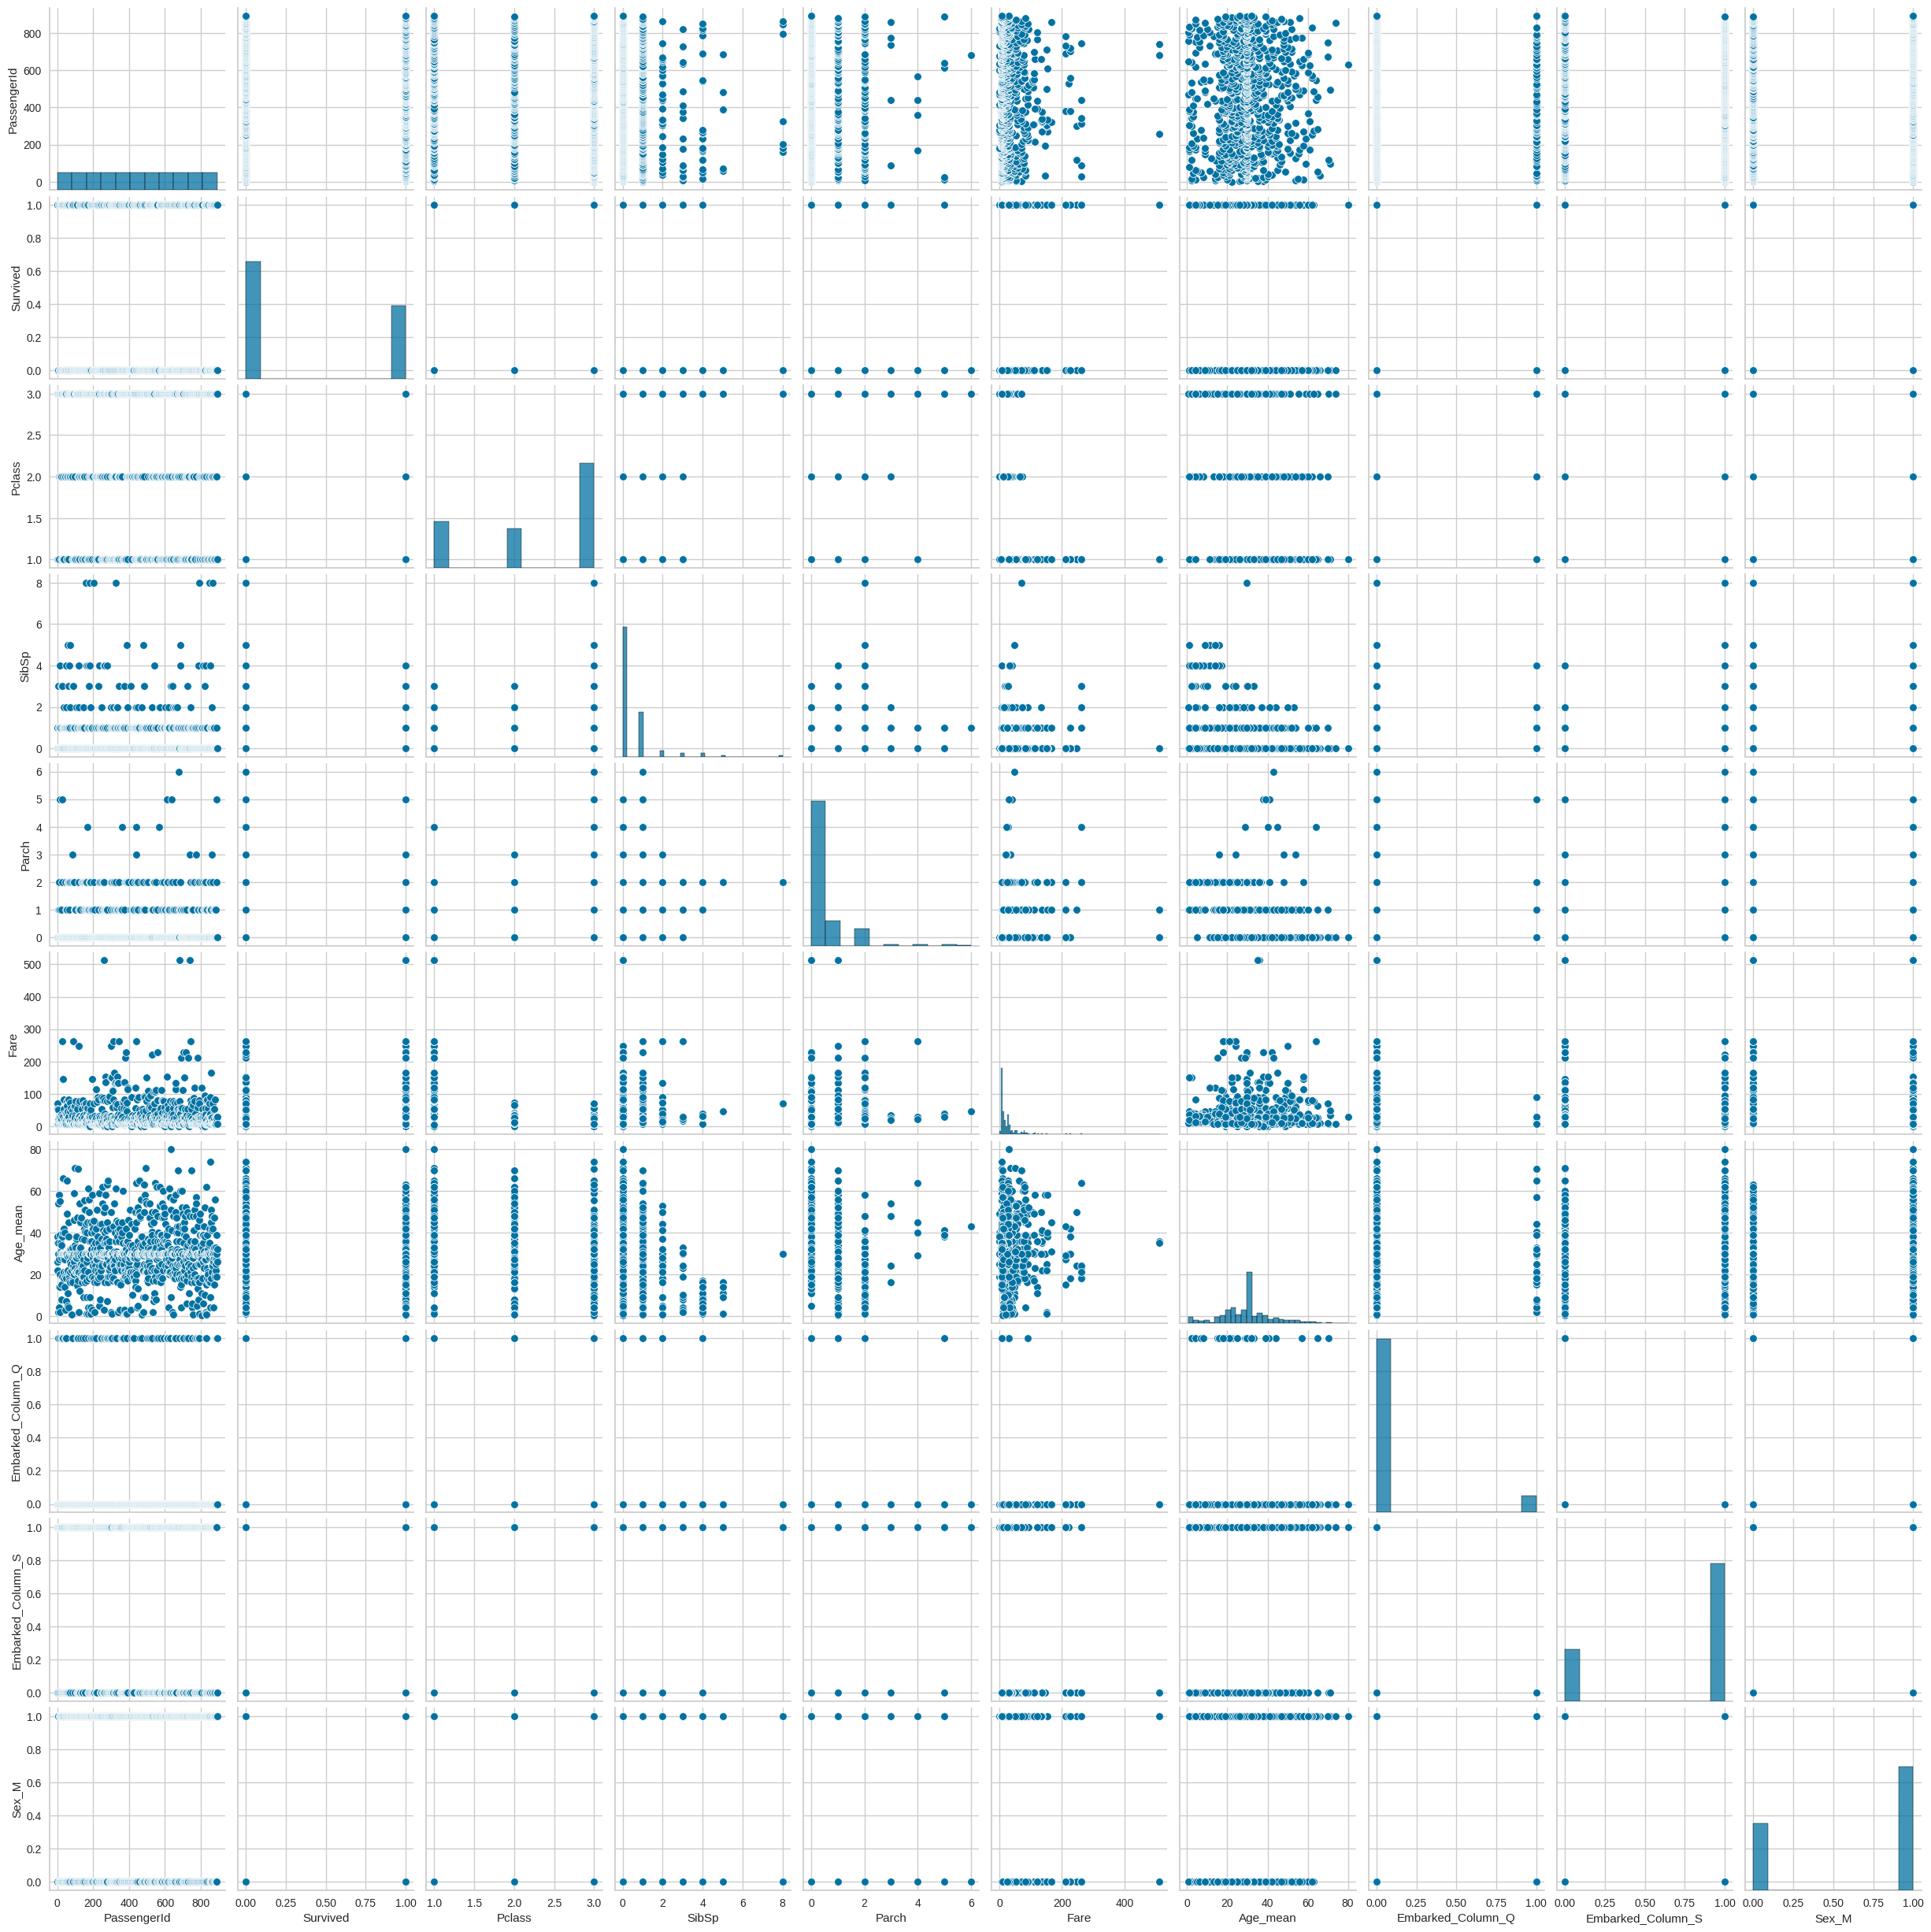

In [37]:
sns.pairplot(
    df
)

In [40]:
h20_df.shape

(891, 10)

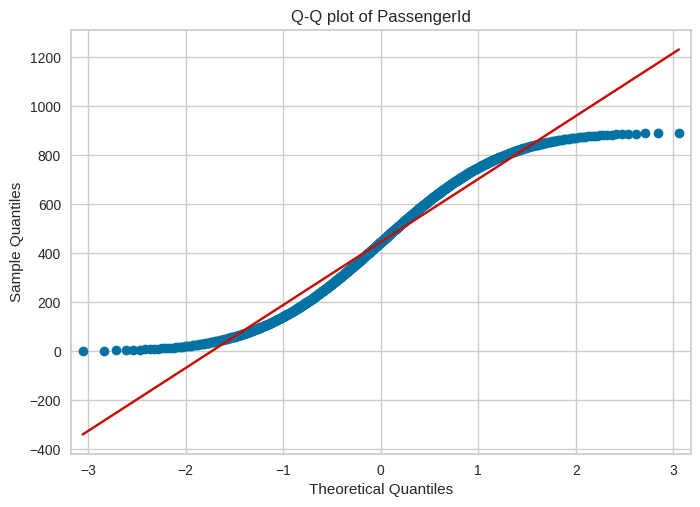

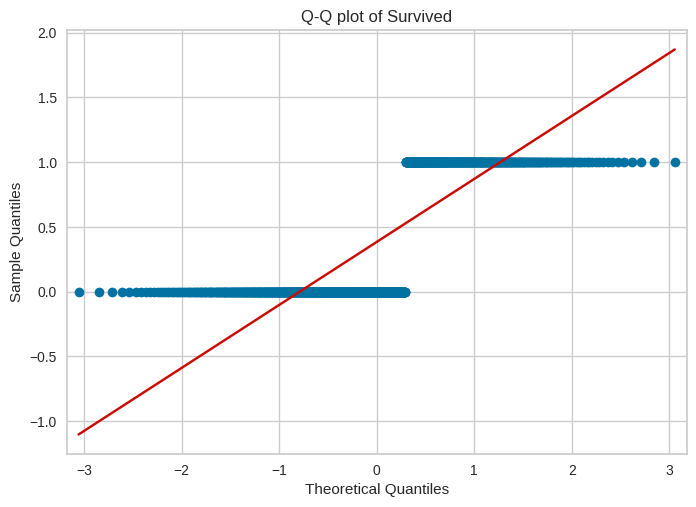

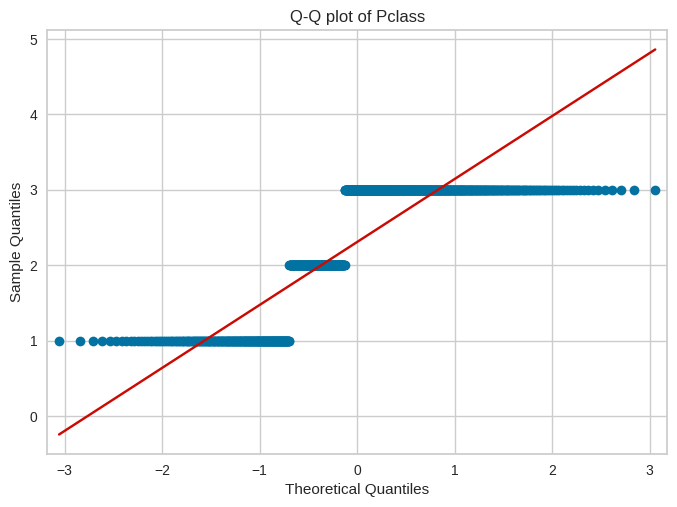

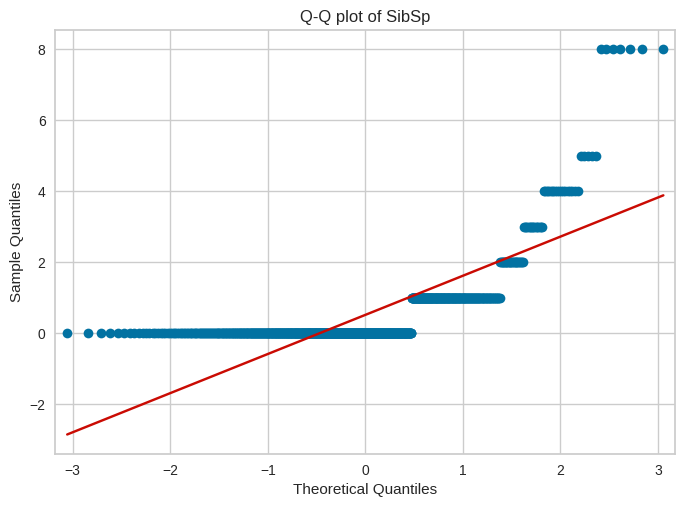

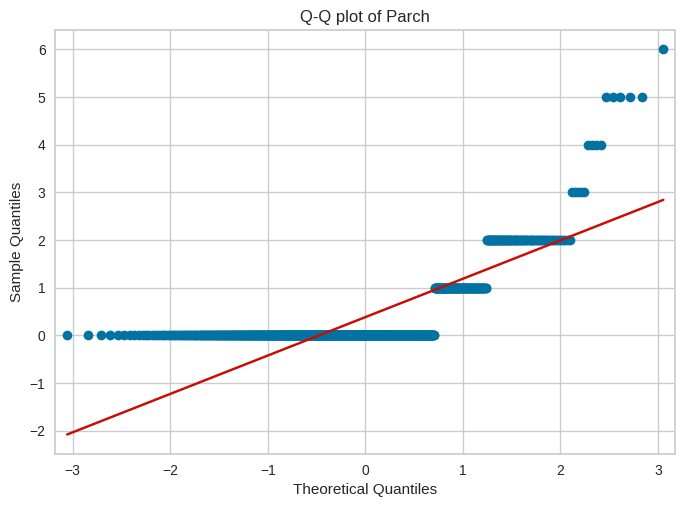

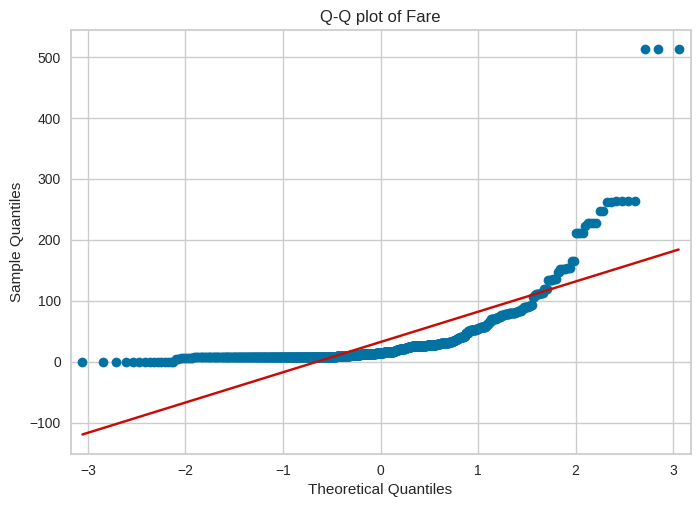

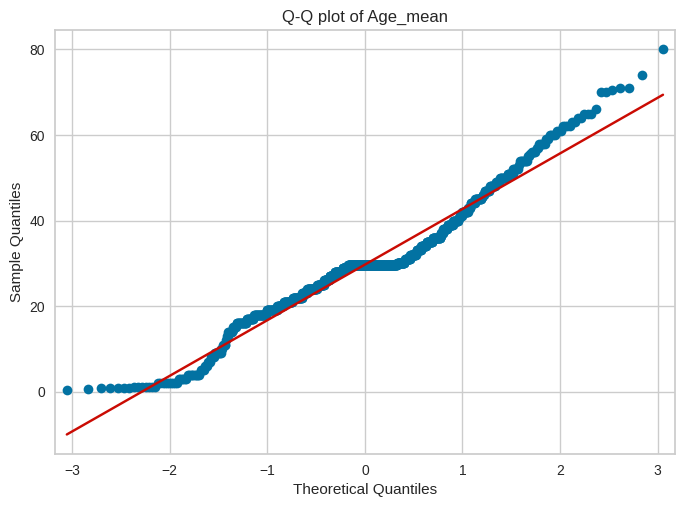

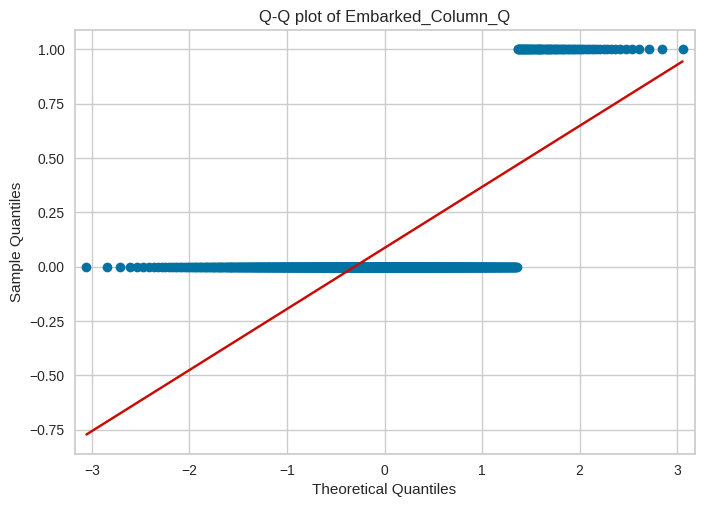

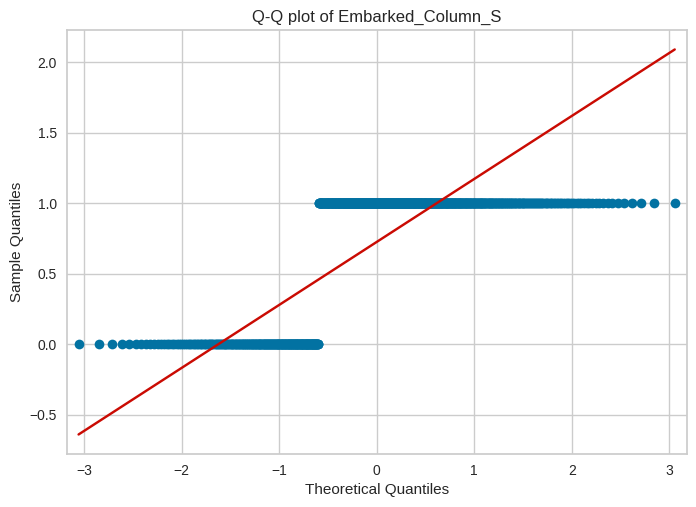

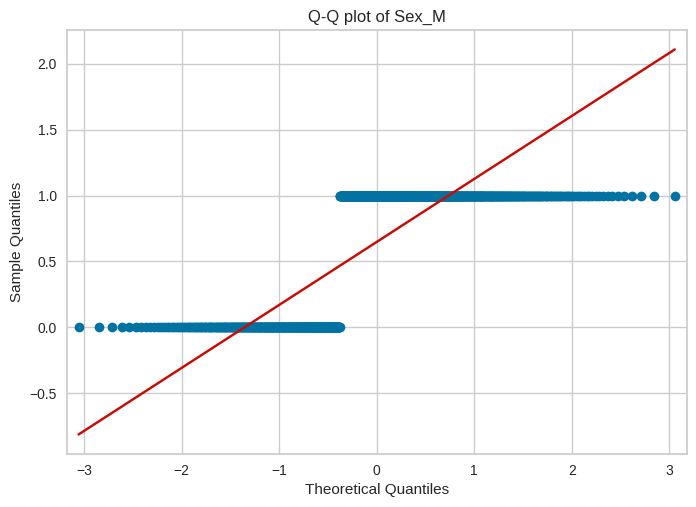

In [41]:
import statsmodels.api as sm
for col in df.columns:
    sm.qqplot(df[col], line='s')
    plt.title('Q-Q plot of ' + col)
    plt.show()

In [44]:
# Create a 80/20 train/test split
split_rows=0.80
data_train, data_test = h2o_df.split_frame([split_rows])

In [45]:
print(data_train.shape)
print(data_test.shape)

(731, 10)
(160, 10)


In [47]:
#Display all columns in X
X=h2o_df.columns
print(X)

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_mean', 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M']


In [48]:
# separate X and y
y ='Survived'
X.remove(y)
print(X)

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_mean', 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M']


By omitting 'Survived' as a predictor, we're effectively prohibiting the model from utilizing the exact variable it's intended to forecast, thereby maintaining the model's autonomy.

This configuration is pivotal for constructing and assessing a machine learning model since it guards against data leakage, guaranteeing that the model bases its predictions on the appropriate information.

In [49]:
# Setting up maximum runtime for the AutoML
auto_ml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

We've established a random seed to ensure reproducibility. This setup enables AutoML to effectively identify the optimal machine learning model and parameters within the specified time frame.

In [50]:
#pass the data through H20AutoML
auto_ml.train(x=X,y=y,training_frame=data_train)

AutoML progress: |
19:50:19.369: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
19:50:24.776: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


19:50:25.940: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
19:50:29.362: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
19:50:29.683: _response param, We have detec

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_195019


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           1/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.09138968154823843
RMSE: 0.3023072634725114
MAE: 0.2187397508907597
RMSLE: 0.2088219846685266
Mean Residual Deviance: 0.09138968154823843
R^2: 0.6143116964270623
Null degrees of freedom: 730
Residual degrees of freedom: 726
Null deviance: 173.21203830369282
Residual deviance: 66.80585721176229
AIC: 337.4809416695878

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13081556164343552
RMSE: 0.3616843397818539
MAE: 0.2633897171266779
RMSLE: 0.253278345821929
Mean Residual Deviance: 0.13081556164343552
R^2: 0.4479241945430519
Null degrees of freedom: 730
Residual degrees of freedom: 725
Null deviance: 173.45683858286378
Residual deviance: 95.62617556135137
AIC: 601.6583504855854

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.263788  0.0266728  0.231178      0.279535      0.270249      0.24217       0.295808
mean_residual_deviance  0.131011  0.0194848  0.113158      0.14945       0.12671       0.112443      0.153296
mse                     0.131011  0.0194848  0.113158      0.14945       0.12671       0.112443      0.153296
null_deviance           34.6914   1.8518     37.6285       34.3602       32.6455       34.9762       33.8464
r2                      0.444586  0.0904291  0.537684      0.347889      0.464359      0.520671      0.352324
residual_deviance       19.1259   2.72544    17.2          22.2681       17.486        16.754        21.9213
rmse                    0.361159  0.0268187  0.336389      0.386588      0.355963      0.335325      0.39153
rmsle                   0.252974  0.0191303  0.231285      0.2702        0.255         0.235624      0.272762

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [51]:
print(auto_ml.leaderboard)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_195019  0.361684  0.130816  0.26339   0.253278                  0.130816
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_195019  0.363238  0.131942  0.266593  0.254291                  0.131942
StackedEnsemble_AllModels_2_AutoML_1_20240219_195019     0.363582  0.132192  0.266006  0.254653                  0.132192
StackedEnsemble_AllModels_3_AutoML_1_20240219_195019     0.364469  0.132838  0.291077  0.255957                  0.132838
GBM_grid_1_AutoML_1_20240219_195019_model_2              0.364589  0.132925  0.272385  0.255583                  0.132925
StackedEnsemble_AllModels_4_AutoML_1_20240219_195019     0.366138  0.134057  0.291945  0.257261                  0.134057
XGBoost_grid_1_AutoML_1_20240219_195019_model_15         0.3669    0.134615  0.274247  0.258379                  0.134615
StackedEnsemble_BestOfFa

**StackedEnsemble_AllModels_1_AutoML_1_20231102_135855**: This model has an RMSE of 0.361684, which is a good measure of its ability to distinguish between positive and negative cases. The MSE is 0.130816, indicating accurate probability predictions. MAE is 0.26339, showing good overall performance. The RMSLE is 0.253278, indicating an error rate for class predictions. RMSE and MSE are 0.361684 and 0.130816, respectively, measuring the accuracy of regression predictions.

**StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_195019**: This model has similar performance to the first Stacked Ensemble with slightly worse metrics.

**StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_195019**: Another Stacked Ensemble with slightly worse metrics than the first one.

**GBM_grid_1_AutoML_1_20240219_195019_model_2**: This is a Gradient Boosting Machine model with an AUC of 0.722509, good logloss, and AUCPR values.

**StackedEnsemble_AllModels_4_AutoML_1_20240219_195019**: Another Gradient Boosting Machine with slightly worse metrics than the previous GBM model.

**XGBoost_grid_1_AutoML_1_20240219_195019_model_15**: An XGBoost model with decent performance.

**StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_195019**: Another XGBoost model with similar performance.

**XGBoost_grid_1_AutoML_1_20240219_195019_model_19 **: Another Gradient Boosting Machine model.

**DeepLearning_grid_1_AutoML_1_20240219_195019_model_2**: Yet another Gradient Boosting Machine model with slightly worse metrics.

**StackedEnsemble_AllModels_2_AutoML_1_20240219_195019**: A Distributed Random Forest model with lower AUC and other metrics.

The Stacked Ensemble models are at the top of the leaderboard, indicating that they combine the predictions of various models to achieve better performance.

In [52]:
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_195019': 0,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_195019': 1,
 'StackedEnsemble_AllModels_2_AutoML_1_20240219_195019': 2,
 'StackedEnsemble_AllModels_3_AutoML_1_20240219_195019': 3,
 'GBM_grid_1_AutoML_1_20240219_195019_model_2': 4,
 'GLM_1_AutoML_1_20240219_195019': 43}

We've created a Python dictionary called models_dict that maps model names to their corresponding indices. The dictionary has the following entries:

'StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_195019': This is the first model in the leaderboard, indicated by the index 0.

'StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_195019': The second model in the leaderboard, with index 1.

'StackedEnsemble_AllModels_2_AutoML_1_20240219_195019': The third model in the leaderboard, with index 2.

'StackedEnsemble_AllModels_3_AutoML_1_20240219_195019': The fourth model in the leaderboard, with index 3.

'GBM_grid_1_AutoML_1_20240219_195019_model_2': The last model in the leaderboard, with index 4.

'GLM_1_AutoML_1_20240219_195019': The last model in the leaderboard, with index 43.

These indices can be used to reference specific models in our code, making it easier to work with them programmatically.

In [53]:
print(model_index)
best_model = h2o.get_model(auto_ml.leaderboard[model_index, "model_id"])

4


We have successfully selected the best model from our AutoML run, which is a **Gradient Boosting Machine (GBM)** model. This model was identified as the best-performing model in our experiment.

In [54]:
best_model.algo

'gbm'

In [55]:
%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-55-57ae2e92d3fa>:6: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


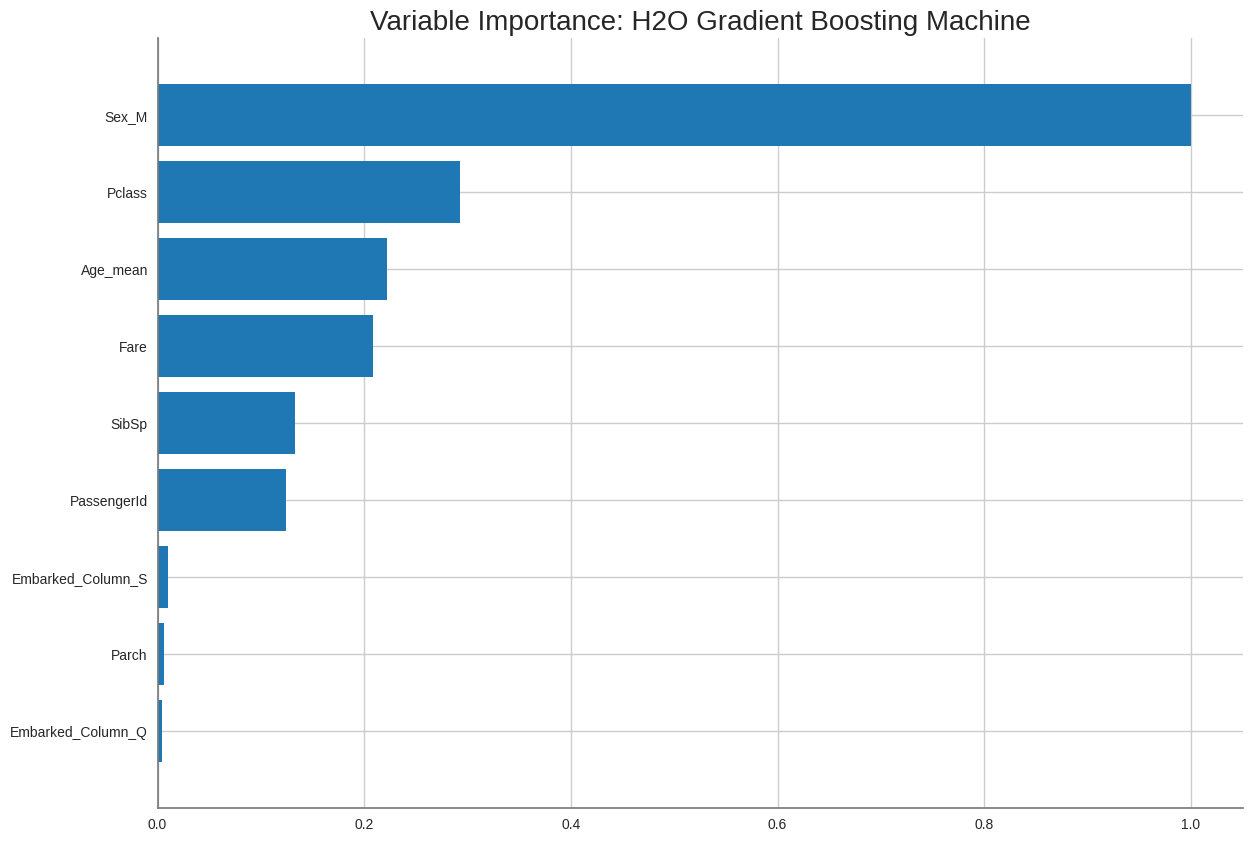

<Figure size 800x550 with 0 Axes>

In [56]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

Variable importance plots are frequently utilized to discern which features or variables exerted the greatest influence on the model's predictions. These visualizations aid in feature selection and comprehension of the model's decision-making mechanisms.

According to the depicted graph, it is apparent that Sex_M, Pclass, and Age_mean are the variables that exerted the most significant impact on the model's predictions.

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-58-7338a7081ba0>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


43
glm


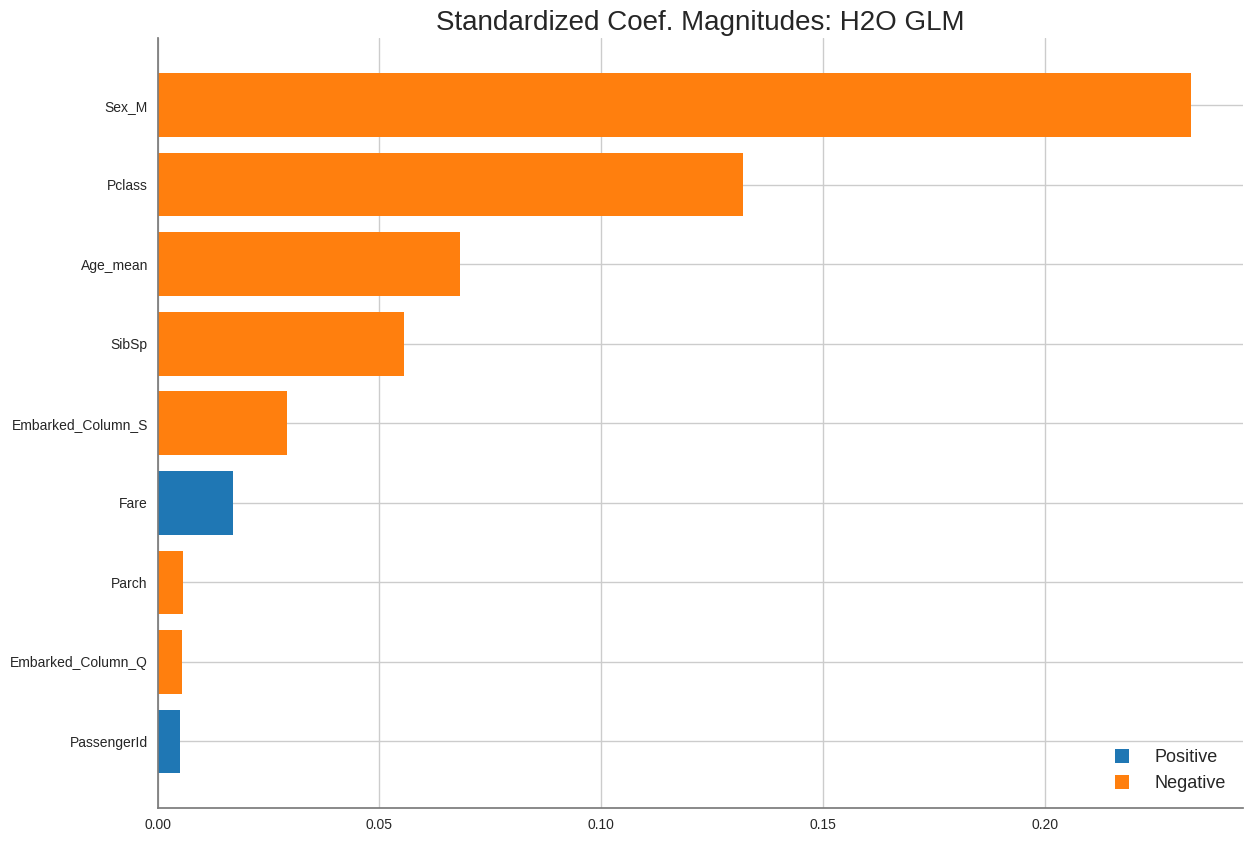

In [58]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

The standard coefficient plot is a widely used tool for interpreting GLM models. It showcases the standardized coefficients of the model's features, providing insights into the magnitude and direction of their influence on the model's predictions. This plot is instrumental in identifying which features have positive or negative associations with the target variable and to what degree. Such insights are crucial for comprehending the relationships between features and the target variable within a GLM framework.

Based on the depicted plot, it can be inferred that the variable 'Fare' exhibits a positive association with our target variable 'Survived', whereas 'Sex_M' demonstrates a negative association.

In [59]:
print(best_model.rmse(train=True))

0.3117530637324743


RMSE serves as a standard measure for assessing the effectiveness of regression models. It quantifies the average size of discrepancies between predicted and actual target values. A smaller RMSE signifies a tighter alignment between the model's predictions and the observed data.

In this instance, an RMSE value of 0.3117530637324743 indicates that the top-performing model demonstrates a favorable alignment with the training data, suggesting that its predictions closely approximate the actual values.

In [63]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    return d

In [67]:
mod_perf = best_model.model_performance(data_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.12920478606754876,
 'rmse': 0.35945067264862474,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

#Interpretation

**mse (Mean Squared Error)**: The average squared difference between predicted values and actual values on the test data is approximately 0.2100. A lower MSE signifies that the model's predictions are closer to actual values, indicating better performance.

**rmse (Root Mean Squared Error)**: The square root of the MSE is around 0.4583, providing an estimate of the average magnitude of errors in our model's predictions. A lower RMSE suggests better model performance.

**null_degrees_of_freedom and residual_degrees_of_freedom**: Degrees of freedom values are not available for our model on the test data, typically indicating the number of parameters used in the model.

**residual_deviance and null_deviance**: Not available for our model on the test data, these statistics are associated with generalized linear models (GLMs) and represent goodness-of-fit.


These statistics offer insights into our model's performance on unseen test data.







In [68]:
predictions = best_model.predict(data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [69]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
      predict
0    0.215695
1    0.949344
2    0.242222
3    0.079765
4    0.804752
..        ...
155  0.120221
156  0.864158
157  0.122493
158  0.846404
159  0.288215

[160 rows x 1 columns]


In [70]:
y_test = h2o.as_list(data_test[y])  # Real Answers
y_test

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


Survived
0           0
1           1
2           0
3           0
4           1
..        ...
155         0
156         1
157         0
158         1
159         0

[160 rows x 1 columns]

The DataFrame contains a single column labeled "Survived," which represents the actual target values (0 or 1) for each corresponding row in our test dataset.

In [71]:
print(X)

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_mean', 'Embarked_Column_Q', 'Embarked_Column_S', 'Sex_M']


#Regularization

In [72]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

survive_glm = H2OGeneralizedLinearEstimator(
    family="binomial", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
survive_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=0, nfolds=5
)  # RIDGE Regularization
survive_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="binomial", alpha=1, nfolds=5
)  # LASSO Regularization
survive_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

We've created several Generalized Linear Models (GLMs) using H2O with different configurations and regularization techniques. Here's a brief summary of each model:

**survive_glm**: This is a GLM with binomial family and elastic net regularization (a combination of L1 and L2 regularization). We've set lambda_ to 0 (which corresponds to a 50-50 mix of L1 and L2 regularization) and enabled the computation of p-values. It uses 5-fold cross-validation.

**survive_glm_regularization_ridge**: This GLM also uses the binomial family but with only ridge (L2) regularization. We've set alpha to 0, which means it's purely ridge regularization. It uses 5-fold cross-validation.

**survive_glm_regularization_lasso**: Similar to the previous model but with pure lasso (L1) regularization. We've set alpha to 1, which corresponds to lasso regularization. It uses 5-fold cross-validation.

**survive_glm_regularization_lamba_search**: This GLM uses the binomial family and performs a lambda search. Lambda search automatically finds the best lambda value for regularization based on the data and model performance.

These models are configured with different regularization techniques and settings to see how they perform on our dataset.

In [73]:
survive_glm.train(x=X, y=y, training_frame=data_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708370800300_26


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              9                             9                              5                       py_19_sid_924c

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1395687300270276
RMSE: 0.3735889854198429
LogLoss: 0.4399357600055252
AUC: 0.8574570756132619
AUCPR: 0.8265047607081113
Gini: 0.7149141512265238
Null degrees of freedom: 730
Residual degrees of freedom: 721
Null deviance: 974.8903369525455
Residual deviance: 643.1860811280778
AIC: 663.1860811280778

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3259856487992531
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      348  101  0.2249   (101.0/449.0)
1      56   226  0.1986   (56.0/282.0)
Total  404  327  0.2148   (157.0/731.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.325986     0.7422    233
max f2                       0.154776     0.800769  298
max f0point5                 0.688879     0.798969  115
max accuracy                 0.633274     0.816689  143
max precision                0.974404     1         0
max recall                   0.05534      1         382
max specificity              0.974404     1         0
max absolute_mcc             0.633274     0.608276  143
max min_per_class_accuracy   0.339511     0.783688  227
max mean_per_class_accuracy  0.426365     0.789027  204
max tns                      0.974404     449       0
max fns                      0.974404     281       0
max fps                      0.00352248   449       399
max tps                      0.05534      282       382
max tnr                      0.974404     1         0
max fnr                      0.974404     0.996454  0
max fpr                      0.00352248   1         399
max tpr                      0.05534      1         382

Gains/Lift Table: Avg response rate: 38.58 %, avg score: 30.41 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109439                   0.931727           0.972074  0.972074           0.375            1.0055    0.375                       1.0055              0.0106383       0.0106383                  -2.79255  -2.79255           -0.00049756
2        0.0205198                   0.631176           0         0.51844            0                0.710737  0.2                         0.867946            0               0.0106383                  -100      -48.156            -0.0160878
3        0.0300958                   0.582205           0.370314  0.471309           0.142857         0.604899  0.181818                    0.784249            0.0035461       0.0141844                  -62.9686  -52.8691           -0.0259047
4        0.0410397                   0.520419           0.972074  0.604846           0.375            0.547195  0.233333                    0.721035            0.0106383       0.0248227                  -2.79255  -39.5154           -0.0264022
5        0.0506156                   0.493193           1.11094   0.700594 

#Interpretations

**Model Type**: We've used a Generalized Linear Model (GLM) with a binomial family, which is suitable for binary classification tasks. The binomial family is commonly used for problems where you're predicting one of two classes (e.g., yes/no, 1/0).

**Regularization**: We applied Elastic Net regularization, which is a combination of L1 (Lasso) and L2 (Ridge) regularization. This helps prevent overfitting and encourages feature selection. The specific combination of L1 and L2 regularization is determined by the alpha parameter.

**Number of Predictors**: The model used 7 predictors (features) for making predictions.


**Training Metrics**:

*MSE (Mean Squared Error)*: This measures the average squared difference between the predicted and actual outcomes. A lower MSE indicates a better fit to the data.

*RMSE (Root Mean Squared Error)*: The square root of MSE. In this case, it's 0.3735, which means, on average, predictions are off by approximately 0.49 units.

*LogLoss*: Logarithmic loss, a common metric for evaluating binary classification models. Lower values are better.

*AUC (Area Under the ROC Curve)*: A value of 0.8574 indicates that the model is better than random guessing. It's a measure of the model's ability to discriminate between the two classes.

*AUCPR (Area Under the Precision-Recall Curve)*: A value of 0.8265 indicates the model's ability to classify positive instances while maintaining precision.

*Gini Coefficient*: The Gini index measures the inequality among values of a frequency distribution. A higher Gini coefficient suggests better discrimination.

*Degrees of Freedom*: Information about the model's complexity.
Deviance: Measures the difference between the model's predicted and actual outcomes.

*AIC (Akaike Information Criterion)*: Measures the quality of the model, considering both the goodness of fit and the model's complexity. A lower AIC indicates a better model.

**Confusion Matrix:**

- True Positives (TP): The model correctly predicted 226 positive instances.
- False Positives (FP): The model incorrectly predicted 101 negative instances as positive.
- True Negatives (TN): The model correctly predicted 348 negative instances.
- False Negatives (FN): The model incorrectly predicted 56 positive instances as negative.

These results provide insights into how well the model is performing on the training data. We can see that the model is making a substantial number of false positives (101) and false negatives (56), indicating some level of misclassification. It's essential to evaluate the model on a separate test dataset to determine if it generalizes well.

Additionally, feature importance information is provided, indicating the relative importance of each predictor in making predictions. In this case, "Time" has the highest importance.



#Lasso Regularization

In [74]:
survive_glm_regularization_lasso.train(x=X, y=y, training_frame=data_train)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708370800300_44


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 2.654E-4 )  9                             9                              4                       py_19_sid_924c

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13955231468535143
RMSE: 0.37356701498573375
LogLoss: 0.4399397997328096
AUC: 0.8574768200413844
AUCPR: 0.8261094900024761
Gini: 0.7149536400827687
Null degrees of freedom: 730
Residual degrees of freedom: 721
Null deviance: 974.8903369525455
Residual deviance: 643.1919872093678
AIC: 663.1919872093678

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.322031479241645
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      345  104  0.2316   (104.0/449.0)
1      54   228  0.1915   (54.0/282.0)
Total  399  332  0.2161   (158.0/731.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.322031     0.742671  224
max f2                       0.154258     0.800256  290
max f0point5                 0.686842     0.799389  115
max accuracy                 0.634135     0.816689  136
max precision                0.973598     1         0
max recall                   0.056473     1         379
max specificity              0.973598     1         0
max absolute_mcc             0.634135     0.608573  136
max min_per_class_accuracy   0.339345     0.783688  216
max mean_per_class_accuracy  0.4263       0.789027  194
max tns                      0.973598     449       0
max fns                      0.973598     281       0
max fps                      0.00369672   449       399
max tps                      0.056473     282       379
max tnr                      0.973598     1         0
max fnr                      0.973598     0.996454  0
max fpr                      0.00369672   1         399
max tpr                      0.056473     1         379

Gains/Lift Table: Avg response rate: 38.58 %, avg score: 38.58 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109439                   0.96461            2.26817   2.26817            0.875            0.968587   0.875                       0.968587            0.0248227       0.0248227                  126.817   126.817            0.0225955
2        0.0205198                   0.959016           2.5922    2.41939            1                0.961475   0.933333                    0.965268            0.0248227       0.0496454                  159.22    141.939            0.0474182
3        0.0300958                   0.952609           2.5922    2.47437            1                0.956554   0.954545                    0.962495            0.0248227       0.0744681                  159.22    147.437            0.0722409
4        0.0410397                   0.945126           2.5922    2.50579            1                0.948016   0.966667                    0.958634            0.0283688       0.102837                   159.22    150.579            0.10061
5        0.0506156                   0.936888

#Interpretation of the results

**Model Details:**

The model we trained is a Generalized Linear Model (GLM) with Lasso (L1) regularization, where lambda is set to 7.501E-5.

The GLM is of the binomial family, which makes it suitable for binary classification.

The model used 7 predictors for making predictions.

It went through 2 iterations during the training process.

The training data used is named py_4_sid_9fb4.


**Training Metrics:**

*Mean Squared Error (MSE)* is 0.1395, indicating the average squared difference between predicted and actual outcomes.

*Root Mean Squared Error (RMSE)* is 0.3735, which is the square root of MSE.
Log Loss (LogLoss) is 0.6721, a measure of classification accuracy.

*AUC (Area Under the Receiver Operating Characteristic Curve)* is 0.8574, indicating the model's ability to discriminate between classes.

*AUCPR (Area Under the Precision-Recall Curve)* is 0.8261, measuring the model's precision-recall trade-off.

*Gini* is 0.7149, a measure of discrimination quality.
Degrees of freedom, deviance, and Akaike Information Criterion (AIC) are model complexity-related metrics.

**Confusion Matrix:**

- True Negatives (TN): The model correctly predicted "0" for 345 instances where the true class was also "0." These are instances the model correctly identified as not belonging to the positive class.
- False Positives (FP): The model incorrectly predicted "1" for 104 instances where the true class was "0." These are instances the model predicted as positive class when they were actually negative.
- True Positives (TP): The model correctly predicted "1" for 228 instances where the true class was also "1." These are instances the model correctly identified as belonging to the positive class.
- False Negatives (FN): The model incorrectly predicted "0" for 54 instances where the true class was "1." These are instances the model predicted as the negative class when they were actually positive.

**Gains/Lift Table:**

This table shows the response rate and cumulative lift at various percentiles.


In [75]:
lambda_search = survive_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=data_train
)

glm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


In [77]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708370800300_62


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.003182 )  nlambda = 100, lambda.max = 0.5307, lambda.min = 0.003182, lambda.1se = -1.0  9                             9                              56                      py_19_sid_924c

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.14217931911922368
RMSE: 0.37706673032664084
MAE: 0.29242171016372037
RMSLE: 0.26658941641960027
Mean Residual Deviance: 0.14217931911922368
R^2: 0.3999661727095082
Null degrees of freedom: 730
Residual degrees of freedom: 721
Null deviance: 173.21203830369282
Residual deviance: 103.9330822761525
AIC: 670.5511379673235

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse        training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  -------------------  -------------------  -------------------  ------------------
     2024-02-19 21:43:43  0.000 sec   1            .53E0     1             0.23695217278207056  0.5
     2024-02-19 21:43:43  0.009 sec   2            .48E0     2             0.22722648646946306  0.5
     2024-02-19 21:43:43  0.010 sec   3            .44E0     2             0.2187000575985545   0.5
     2024-02-19 21:43:43  0.010 sec   4            .4E0      2             0.21125455829331824  0.5
     2024-02-19 21:43:43  0.011 sec   5            .37E0     2             0.2047771805666283   0.5
     2024-02-19 21:43:43  0.012 sec   6            .33E0     2             0.19916178353379665  0.5
     2024-02-19 21:43:43  0.013 sec   7            .3E0      3             0.19408542878339174  0.5
     2024-02-19 21:43:43  0.013 sec   8            .28E0     3             0.18731142604202422  0.5
     2024-02-19 21:43:43  0.014 sec   9            .25E0     3             0.1815154289813897   0.5
     2024-02-19 21:43:43  0.015 sec   10           .23E0     3             0.17656810887325375  0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                  ---                  ---                  ---
     2024-02-19 21:43:43  0.040 sec   47           .73E-2    9             0.14229426736529677  0.5
     2024-02-19 21:43:43  0.041 sec   48           .67E-2    9             0.14227319113369963  0.5
     2024-02-19 21:43:43  0.041 sec   49           .61E-2    9             0.1422556751506514   0.5
     2024-02-19 21:43:43  0.042 sec   50           .56E-2    10            0.14223858002306428  0.5
     2024-02-19 21:43:43  0.043 sec   51           .51E-2    10            0.14222366667822417  0.5
     2024-02-19 21:43:43  0.043 sec   52           .46E-2    10            0.14221124670612323  0.5
     2024-02-19 21:43:43  0.043 sec   53           .42E-2    10            0.14220092894501465  0.5
     2024-02-19 21:43:43  0.044 sec   54           .38E-2    10            0.1421923568024078   0.5
     2024-02-19 21:43:43  0.045 sec   55           .35E-2    10            0.14218523524813803  0.5
     2024-02-19 21:43:43  0.045 sec   56           .32E-2    10            0.14217931911922244  0.5      56            0.37706673032664084  0.14217931911922368  0.29242171016372037  0.3999661727095082
[56 ro

Above parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.



MSE is 0.14217931911922368      
RMSE is  0.37706673032664084      
MAE is 0.29242171016372037  
RMSLE is 0.26658941641960027      
R-squared is 0.3999661727095082                
Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model.

In [78]:
coeff_table = survive_glm._model_json["output"]["coefficients_table"]

In [80]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error    z_value       p_value  \
0          Intercept      5.109613   0.628709   8.127148  4.395076e-16   
1        PassengerId      0.000203   0.000388   0.524245  6.001082e-01   
2             Pclass     -1.052803   0.155979  -6.749646  1.482061e-11   
3              SibSp     -0.421681   0.129093  -3.266477  1.088947e-03   
4              Parch     -0.061929   0.134117  -0.461752  6.442595e-01   
5               Fare      0.001679   0.002423   0.693074  4.882633e-01   
6           Age_mean     -0.038011   0.008696  -4.371206  1.235621e-05   
7  Embarked_Column_Q     -0.182252   0.431394  -0.422474  6.726793e-01   
8  Embarked_Column_S     -0.397303   0.256698  -1.547747  1.216833e-01   
9              Sex_M     -2.736194   0.224060 -12.211905  2.685274e-34   

   standardized_coefficients  
0                  -0.633675  
1                   0.051980  
2                  -0.881063  
3                  -0.469350  
4                  -0.049225  
5                   0.087777  
6                  -0.492083  
7                  -0.050438  
8                  -0.178329  
9                  -1.300122

#Interpretations

**Intercept:**

- Coefficient: 5.1096
- This represents the model's baseline prediction when all other predictor variables are zero.
- The model starts with this value as a base prediction.

**PassengerId:**

- For a one-unit increase in the "PassengerId" predictor, the log-odds of the response variable (a binary outcome) increase by 0.000203 when all other predictors are held constant.
- The standardized coefficient shows the importance of this predictor relative to others after standardization.

**Pclass:**

- For a one-unit increase in the "Pclass" predictor, the log-odds of the response variable decrease by -1.052803 when all other predictors are held constant.

**Sibsp, Parch, Fare, Age_mean, and Sex_M:**

These predictors have similar information, including coefficients, standard errors, z-values, p-values, and standardized coefficients.
We can interpret them in the same way as the "Pclass" and "PassengerId" predictors.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_grid_1_AutoML_1_20240219_195019_model_17             0.354307  0.125534  0.277645  0.253644                  0.125534                  94                   0.055548  GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_195019  0.359291  0.12909   0.2667    0.255472                  0.12909                  261                   0.283635  StackedEnsemble
GBM_grid_1_AutoML_1_20240219_195019_model_2              0.359451  0.129205  0.270264  0.257283                  0.129205                  70                   0.03226   GBM
XGBoost_grid_1_AutoML_1_20240219_195019_model_29         0.362128  0.131137  0.271278  0.260243                  0.131137                 263                   0.034756  XGBoost
GBM_5_AutoML_1_20240219_195019                           0.362405  0.131338  0.274434  0.261388                  0.131338                 116                   0.049195  GBM
GBM_grid_1_AutoML_1_20240219_195019_model_12             0.362716  0.131563  0.257799  0.258928                  0.131563                  98                   0.021194  GBM
StackedEnsemble_AllModels_1_AutoML_1_20240219_195019     0.362933  0.13172   0.268588  0.26029                   0.13172                  299                   0.280542  StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20240219_195019     0.363038  0.131797  0.286721  0.258124                  0.131797                 626                   0.713828  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20240219_195019     0.363041  0.131799  0.286728  0.258125                  0.131799                 510                   1.30834   StackedEnsemble
XGBoost_grid_1_AutoML_1_20240219_195019_model_20         0.363854  0.132389  0.278175  0.261815                  0.132389                2145                   0.029939  XGBoost
GBM_grid_1_AutoML_1_20240219_195019_model_5              0.364449  0.132823  0.262066  0.260802                  0.132823                 199                   0.057172  GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_195019  0.364557  0.132901  0.270489  0.261687                  0.132901                 170                   0.151078  StackedEnsemble
GBM_2_AutoML_1_20240219_195019                           0.365636  0.13369   0.268504  0.261832                  0.13369                  236                   0.025598  GBM
DeepLearning_grid_1_AutoML_1_20240219_195019_model_1     0.365794  0.133805  0.260682  0.262735                  0.133805                7180                   0.063769  DeepLearning
GBM_grid_1_AutoML_1_20240219_195019_model_7              0.366286  0.134166  0.304906  0.262968                  0.134166                  62                   0.017186  GBM
GBM_grid_1_AutoML_1_20240219_195019_model_25             0.366899  0.134615  0.276735  0.263986                  0.134615                 109                   0.101517  GBM
XGBoost_grid_1_AutoML_1_20240219_195019_model_25         0.367095  0.134759  0.272861  0.261882                  0.134759                1419                   0.007815  XGBoost
StackedEnsemble_AllModels_2_AutoML_1_20240219_195019     0.367362  0.134954  0.263286  0.264663                  0.134954                 403                   0.434899  StackedEnsemble
GBM_grid_1_AutoML_1_20240219_195019_model_9              0.368609  0.135873  0.29211   0.265054                  0.135873                  73                   0.028571  GBM
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_195019  0.3687    0.13594   0.26403   0.265729                  0.13594                  278                   0.181586  StackedEnsemble
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

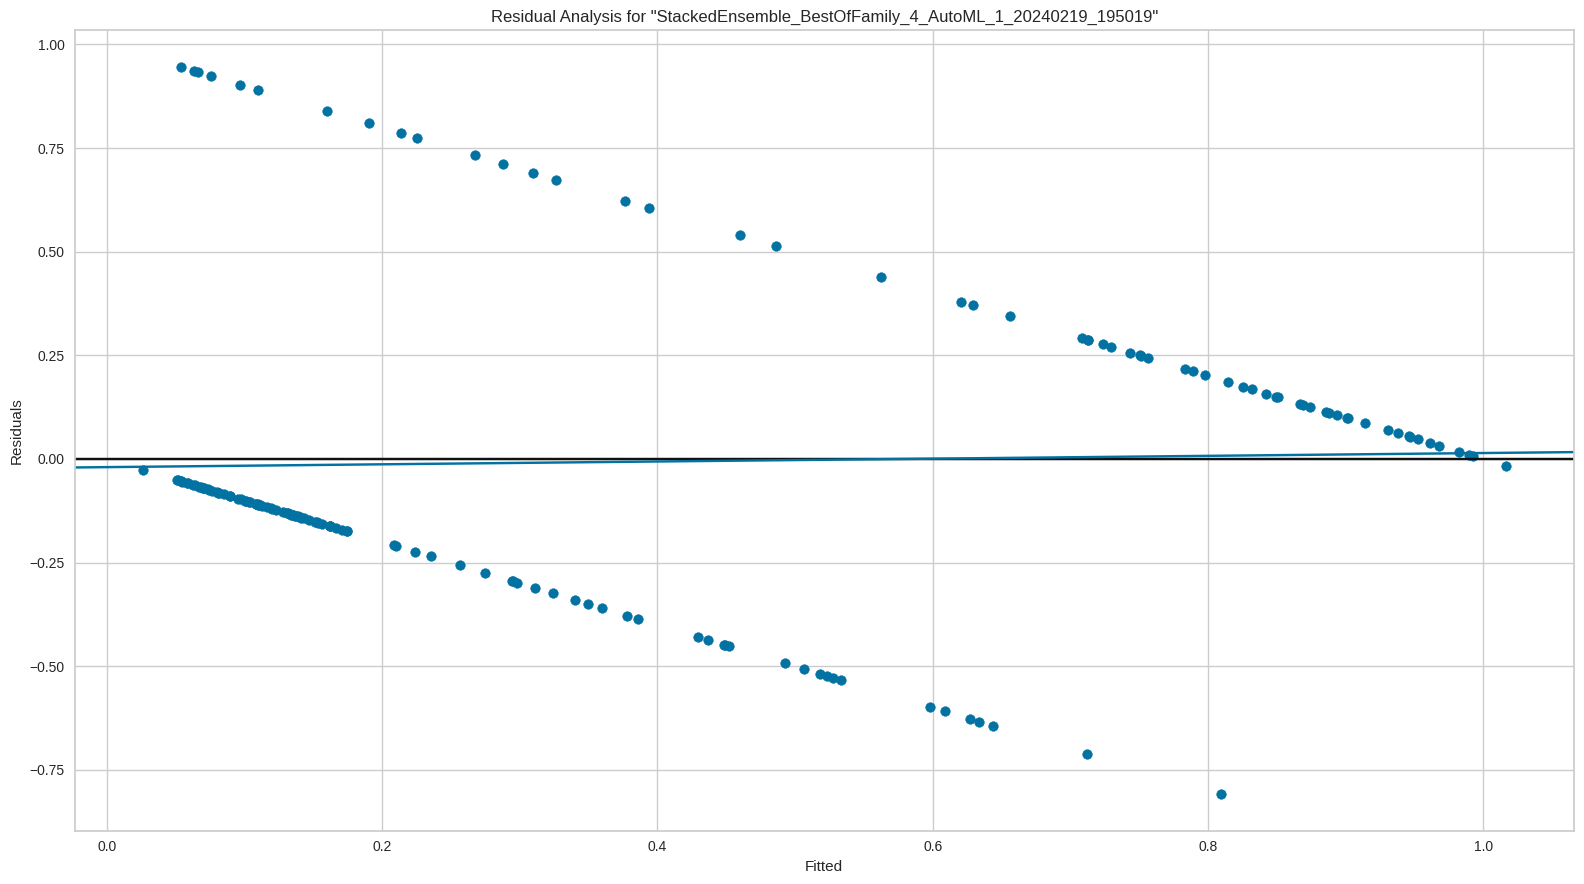

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

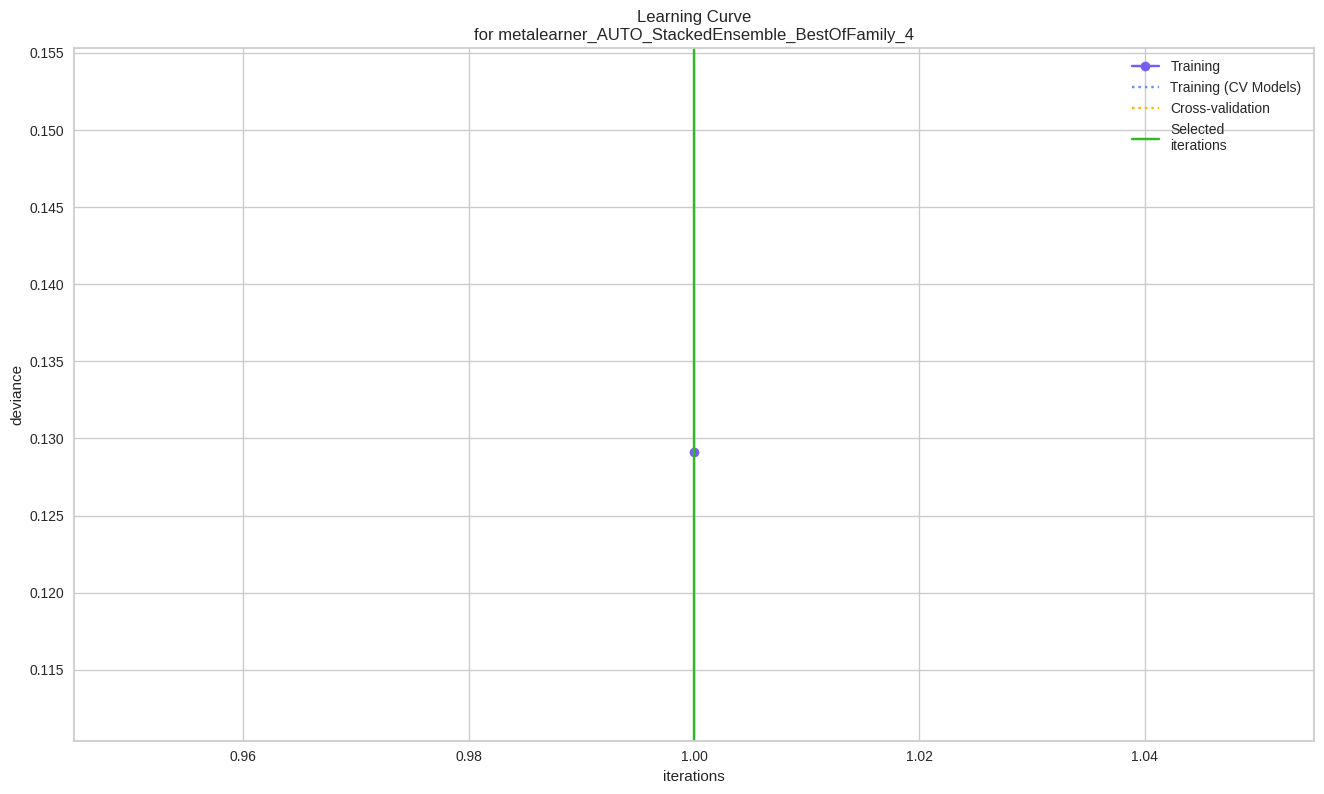

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

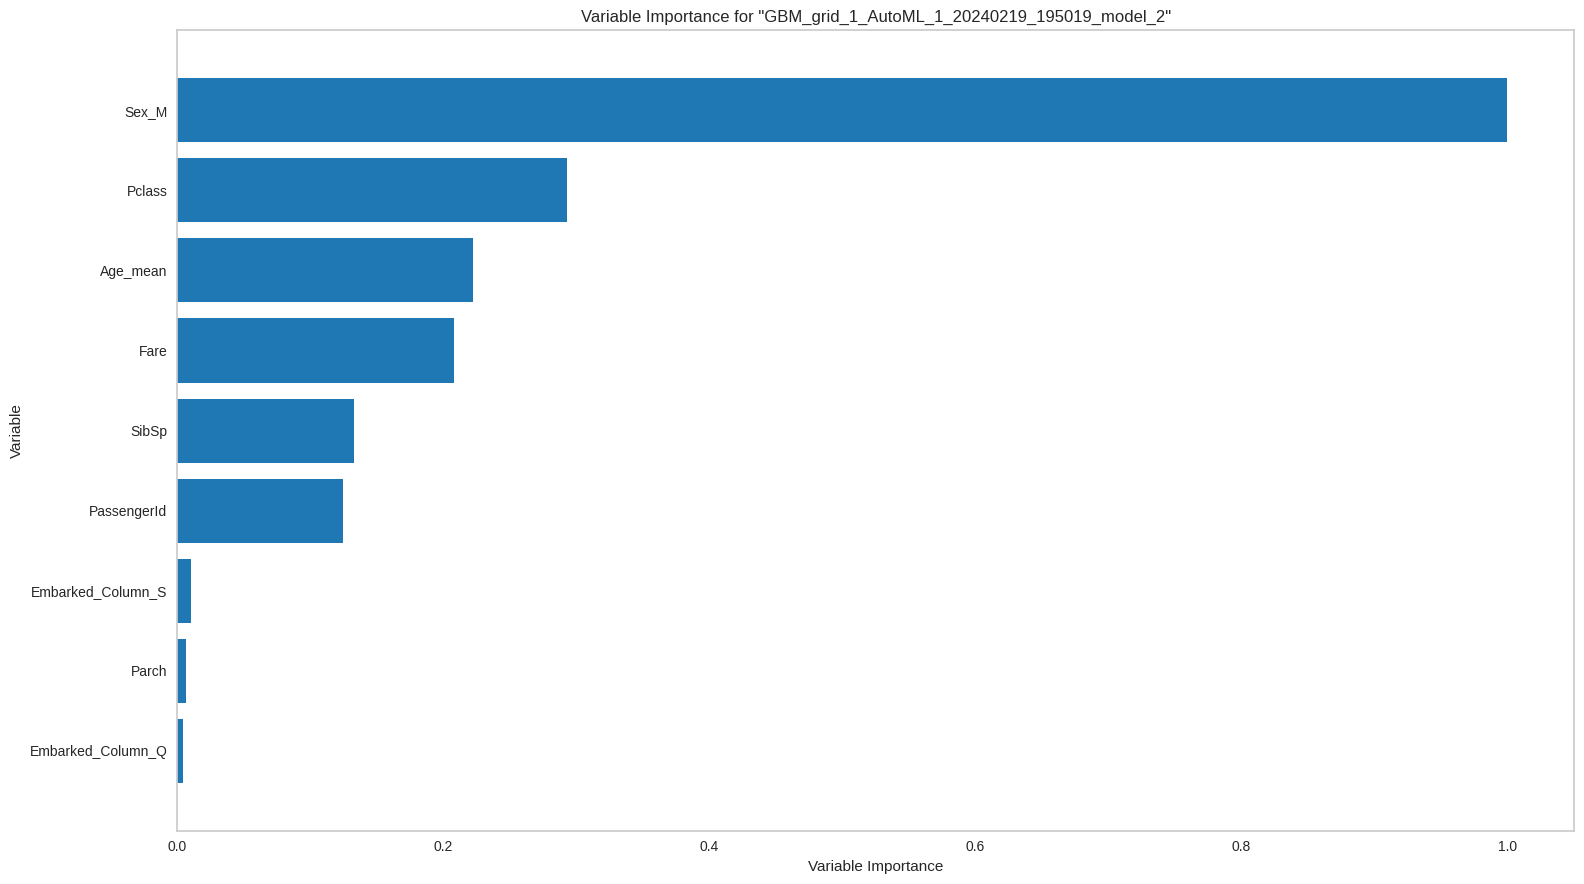

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

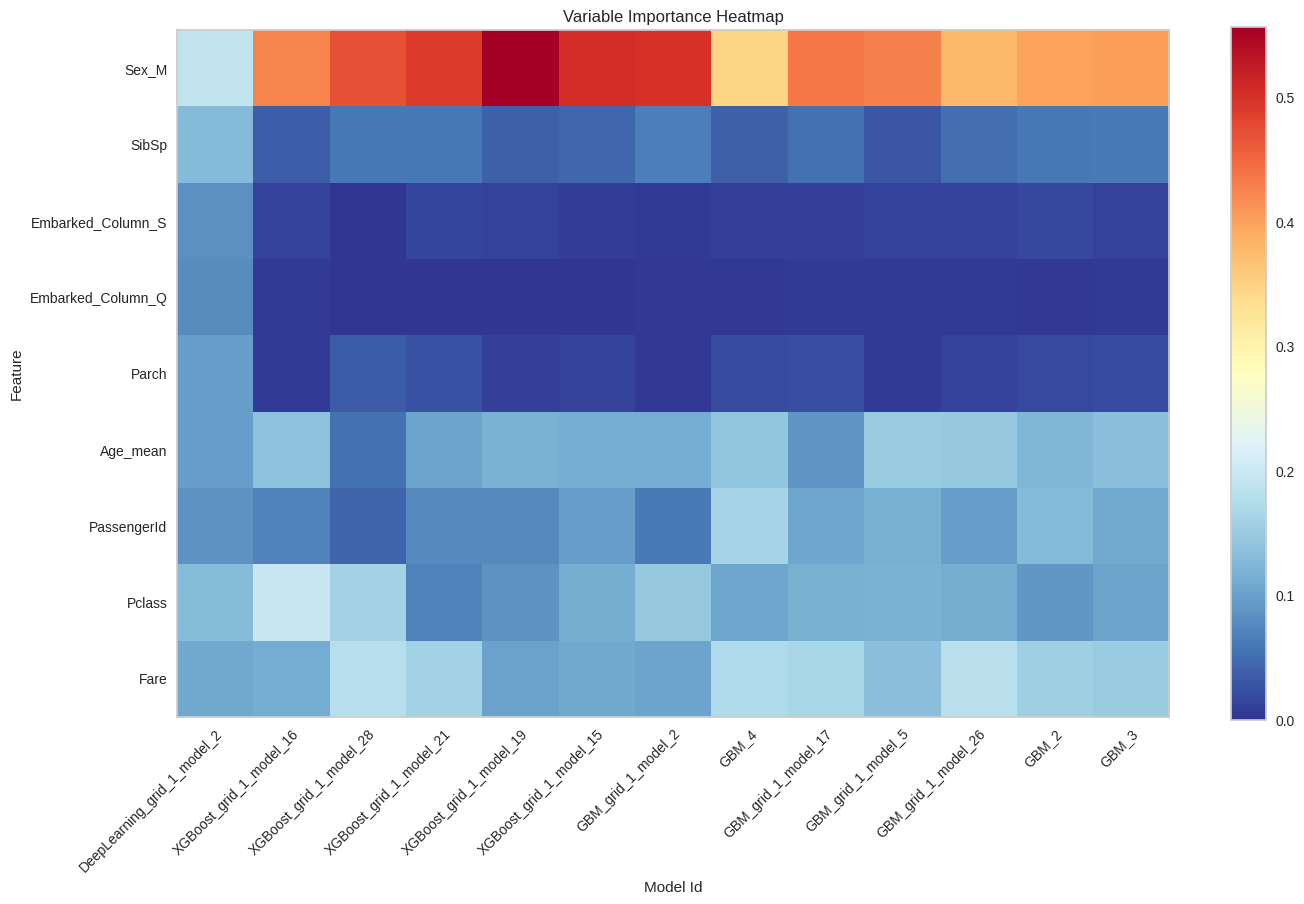

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

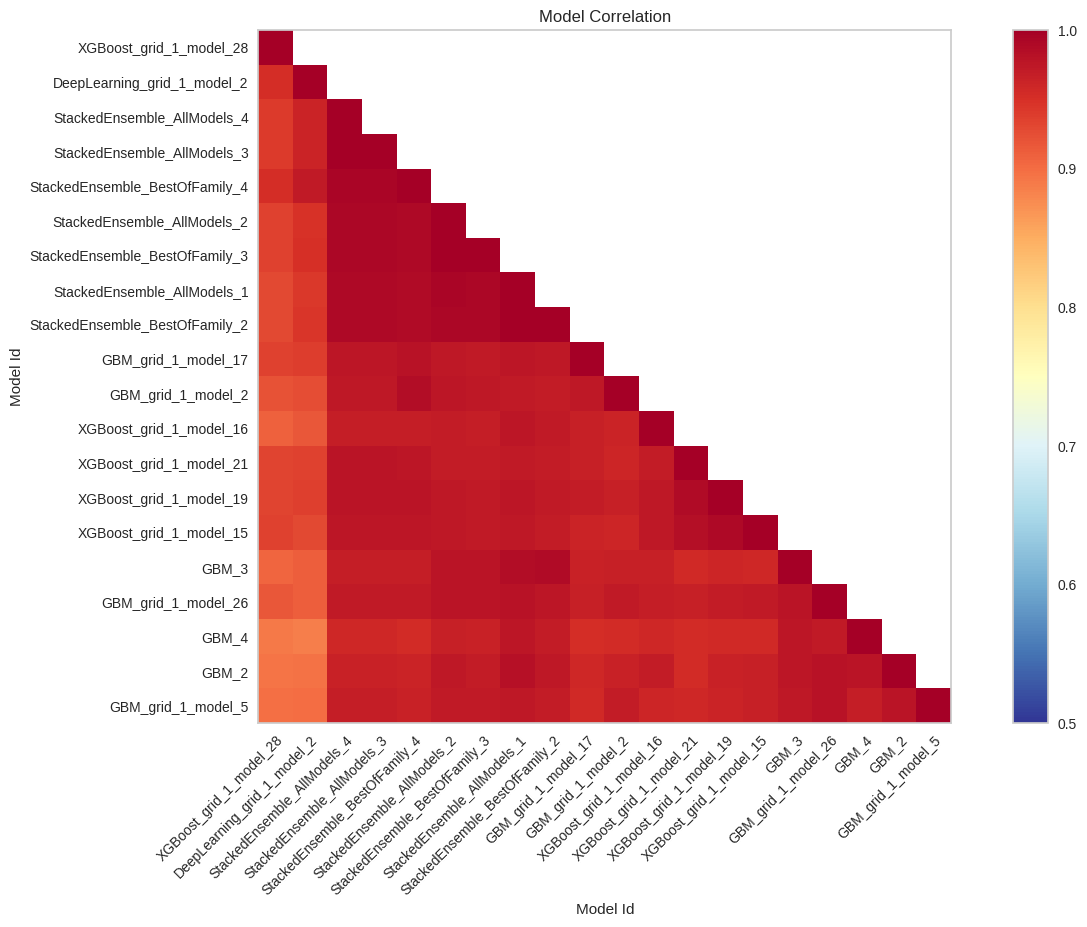

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

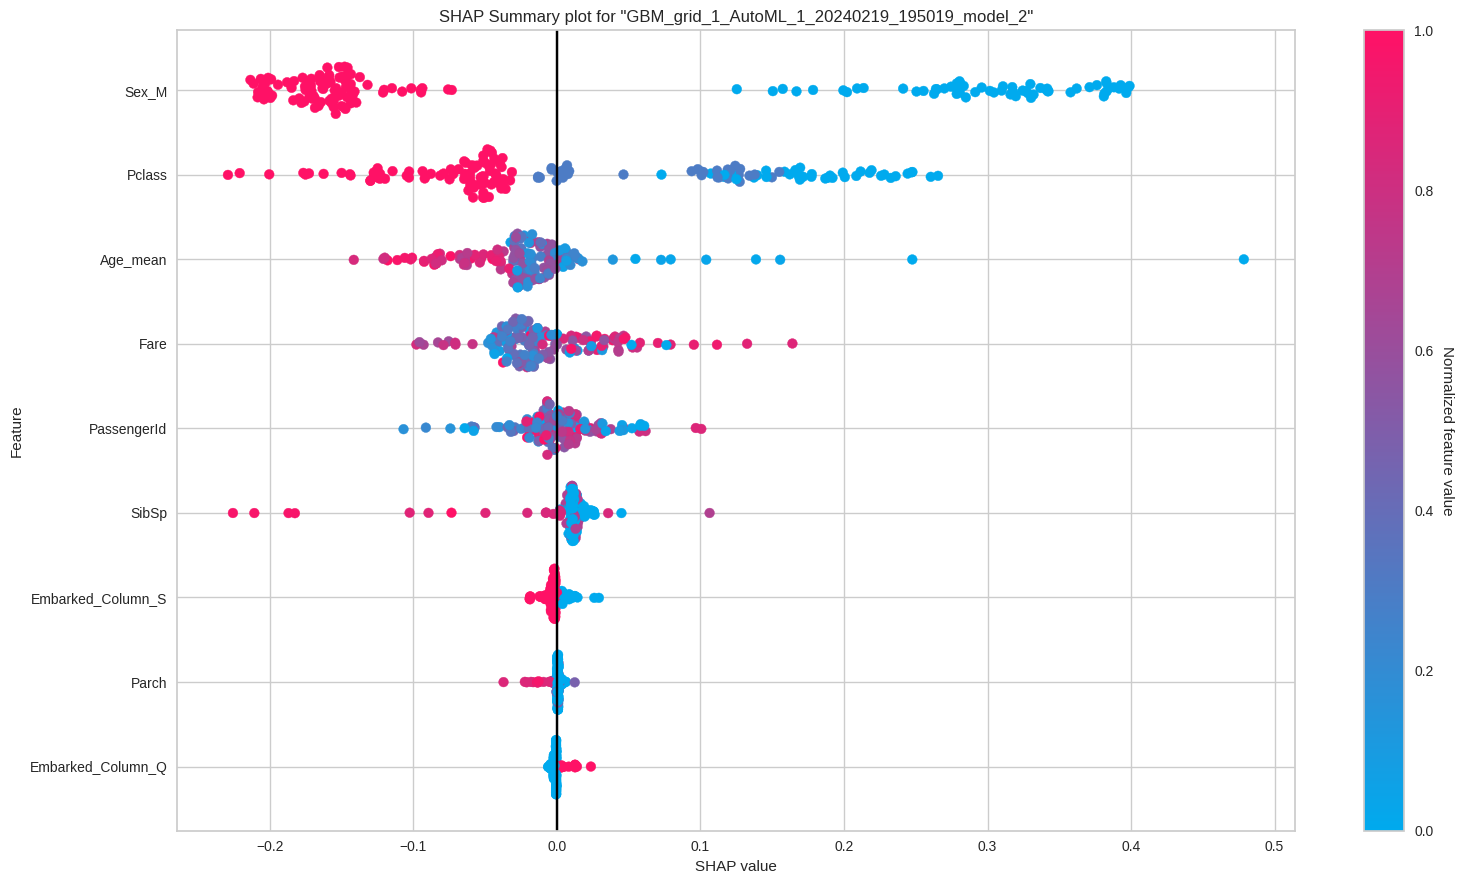

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

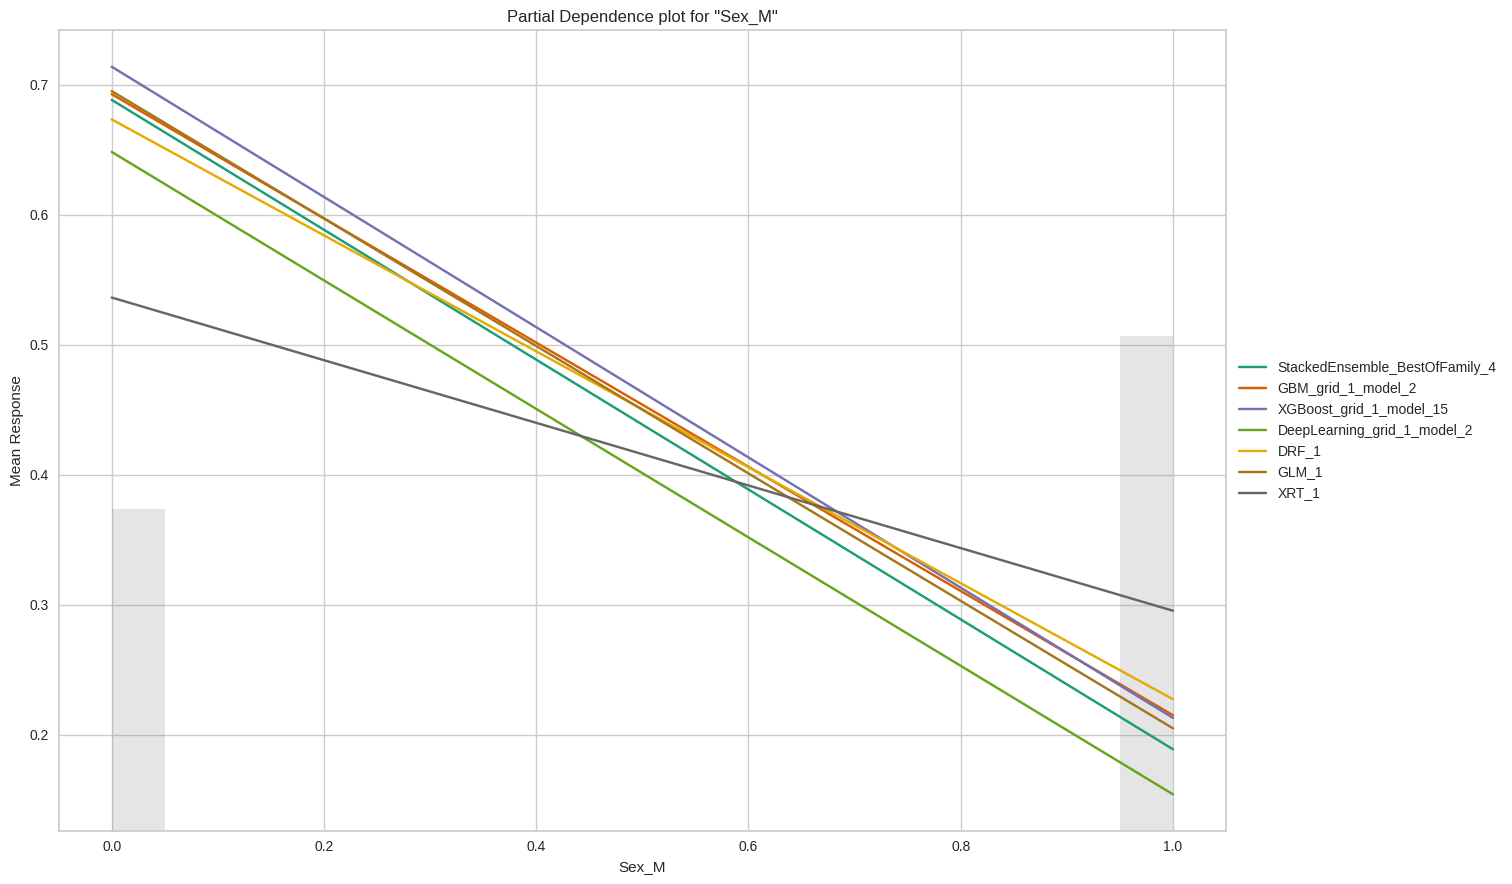

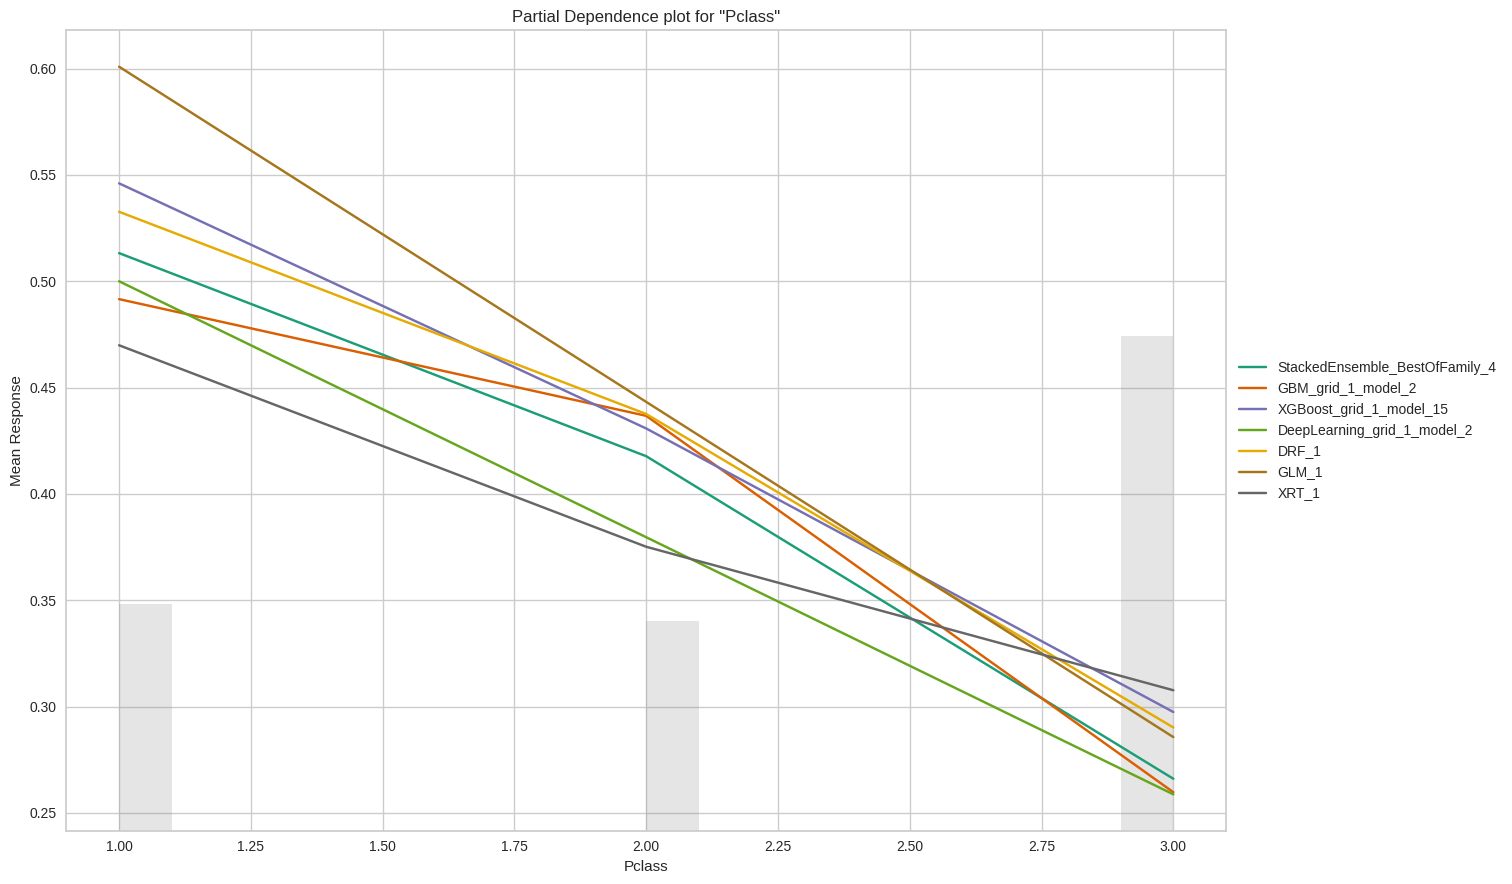

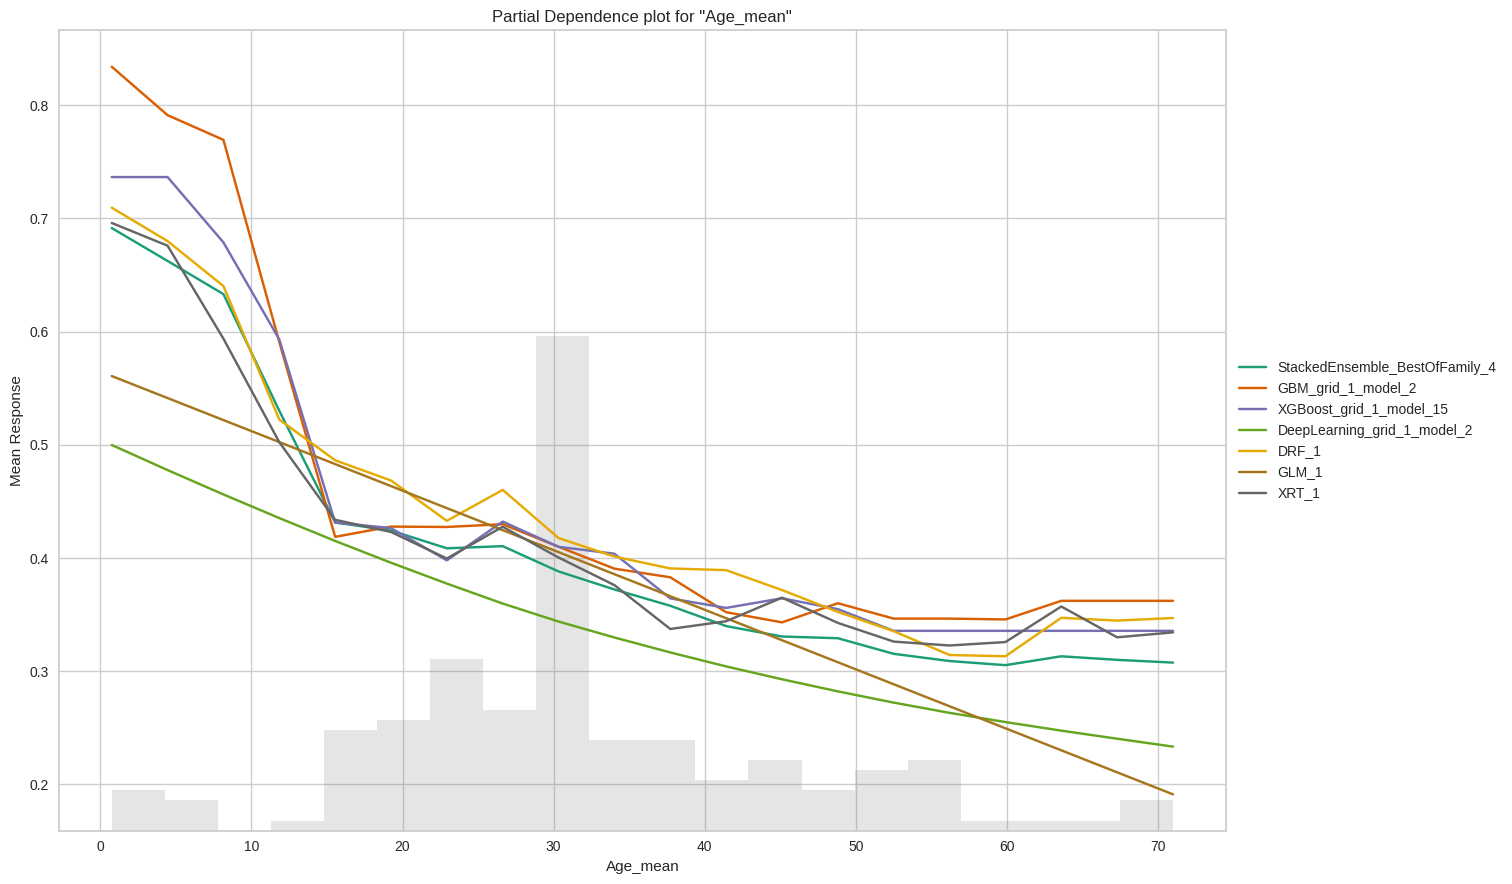

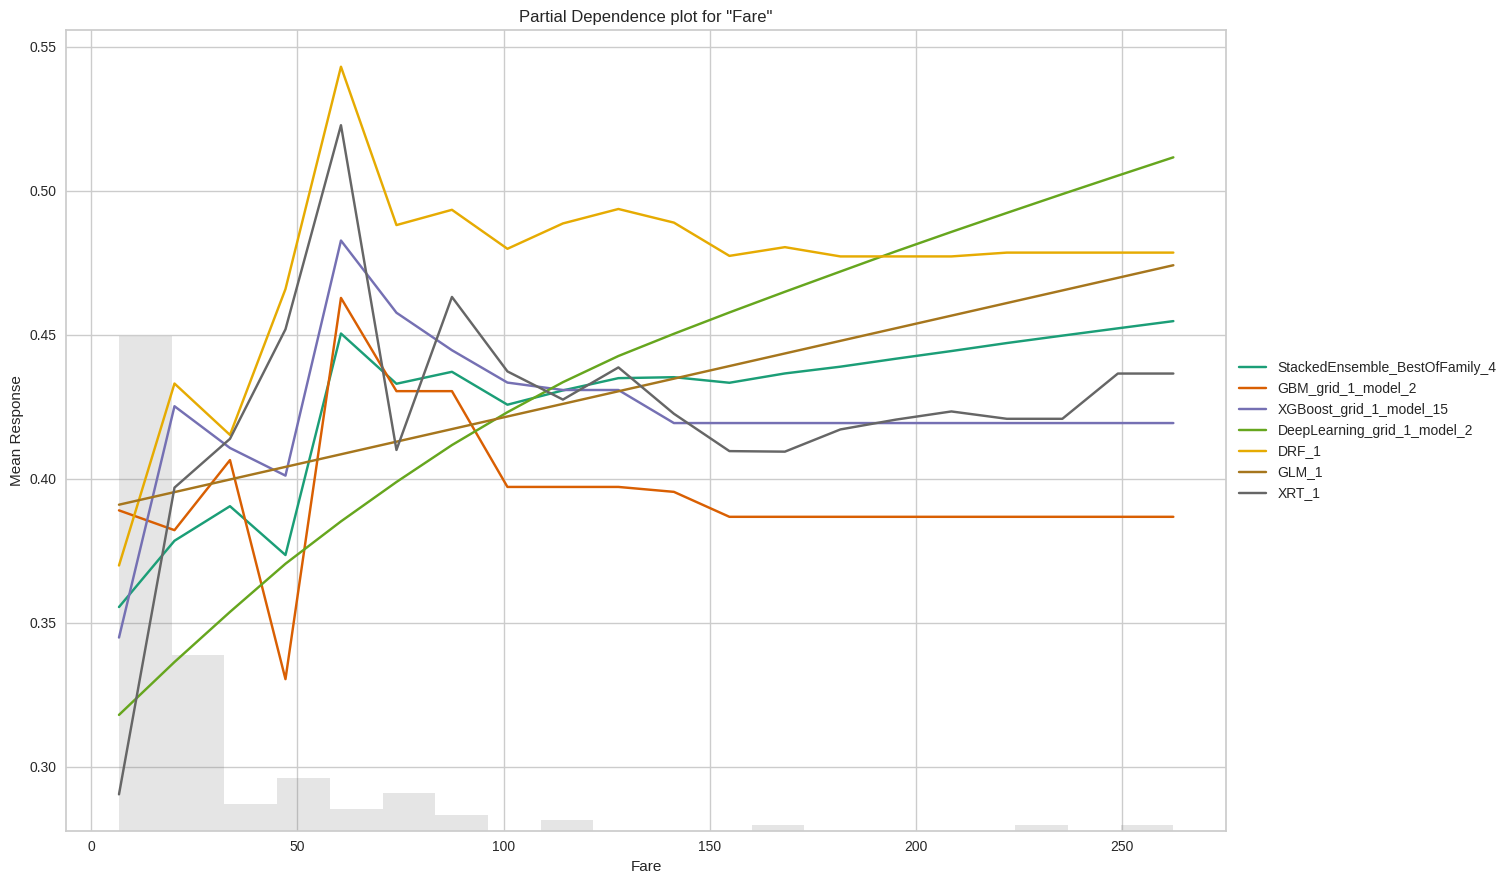

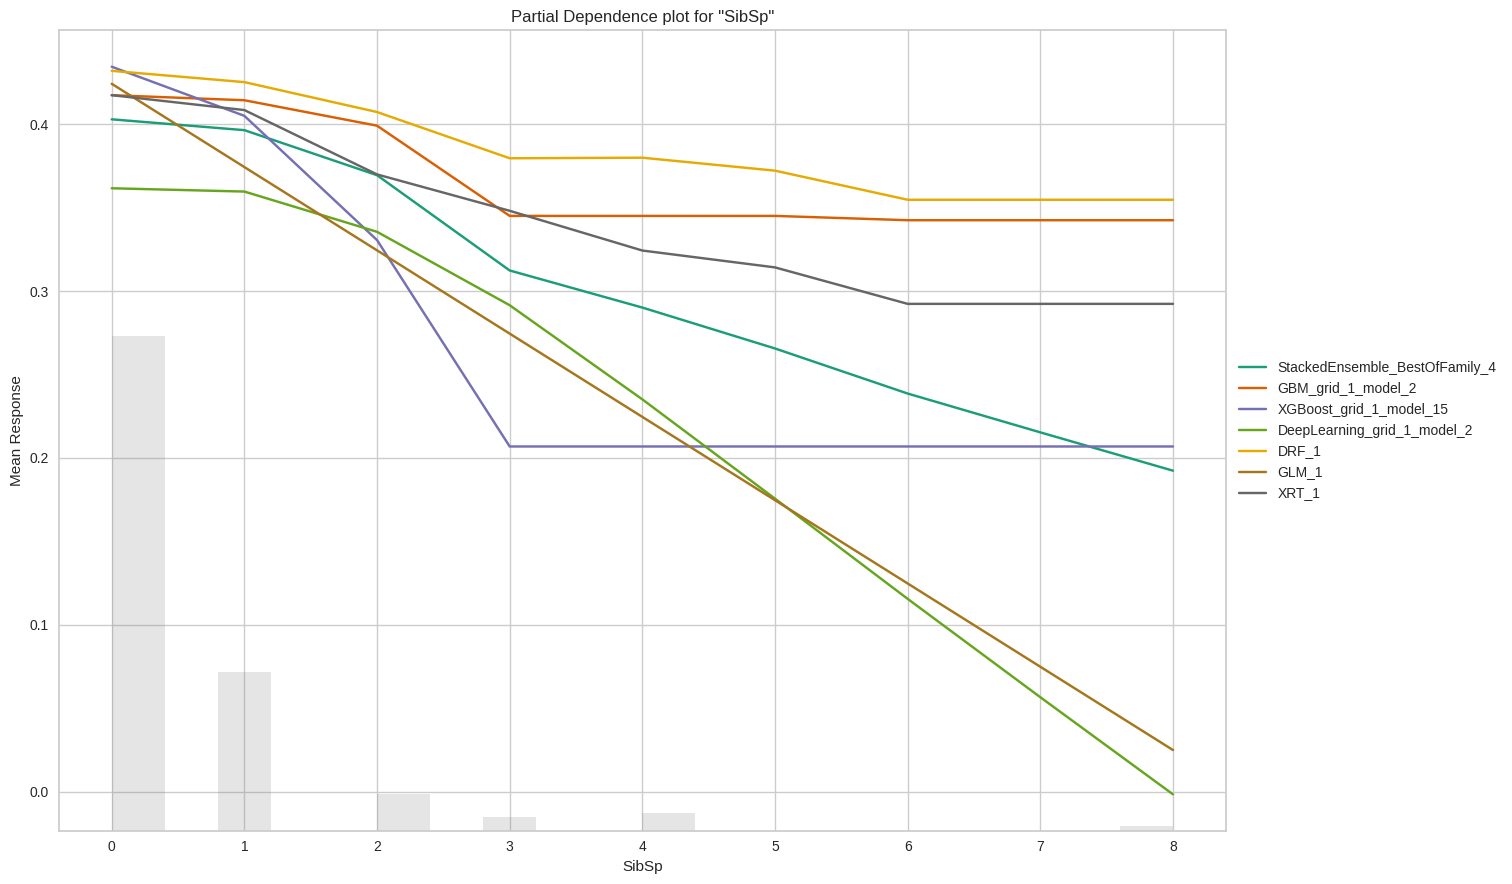

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

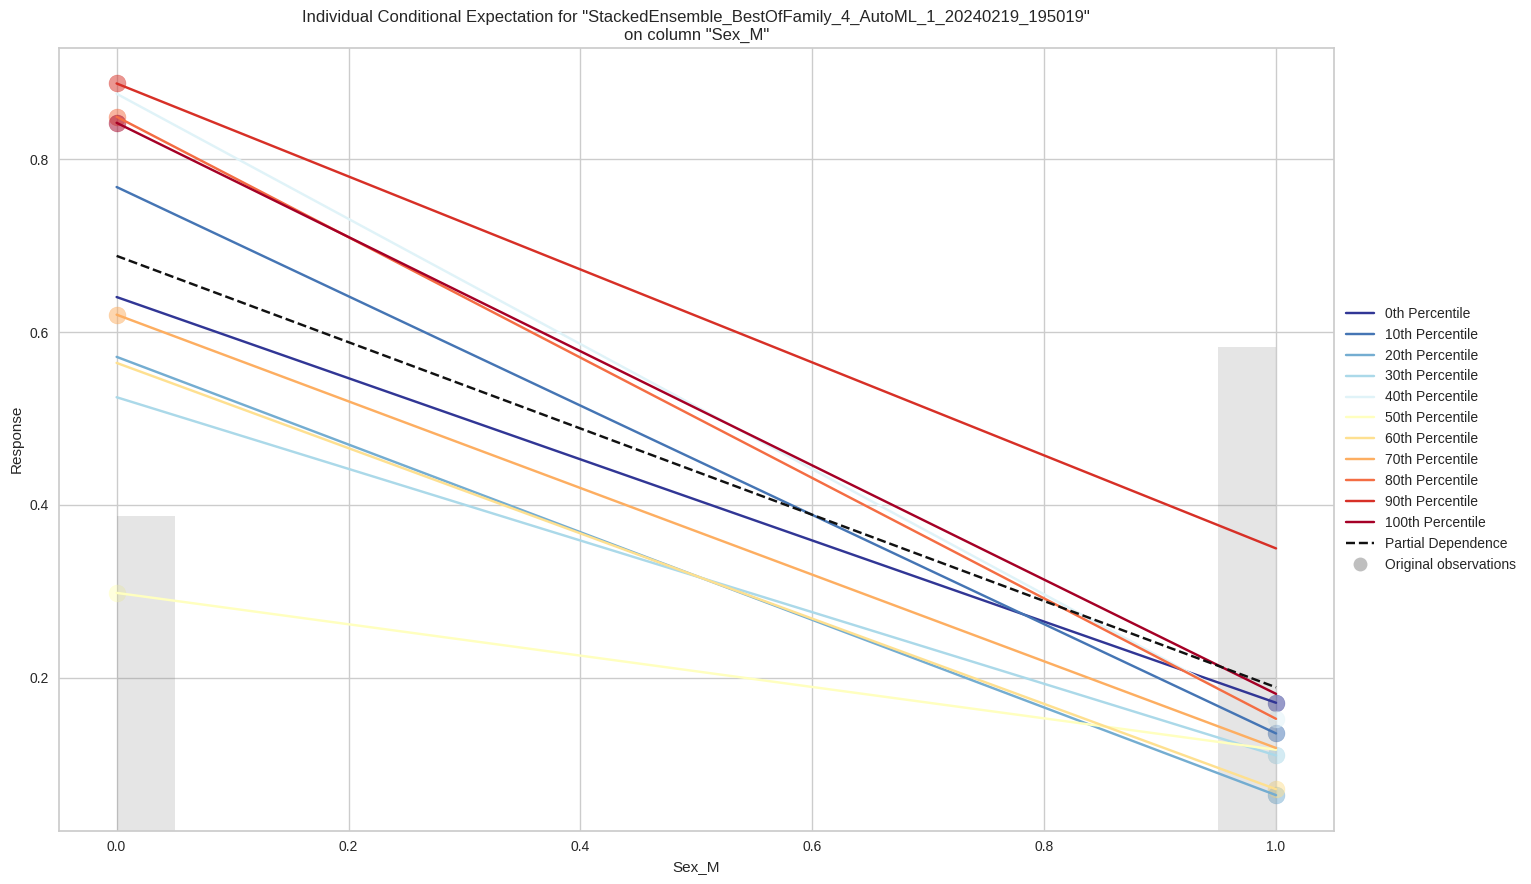

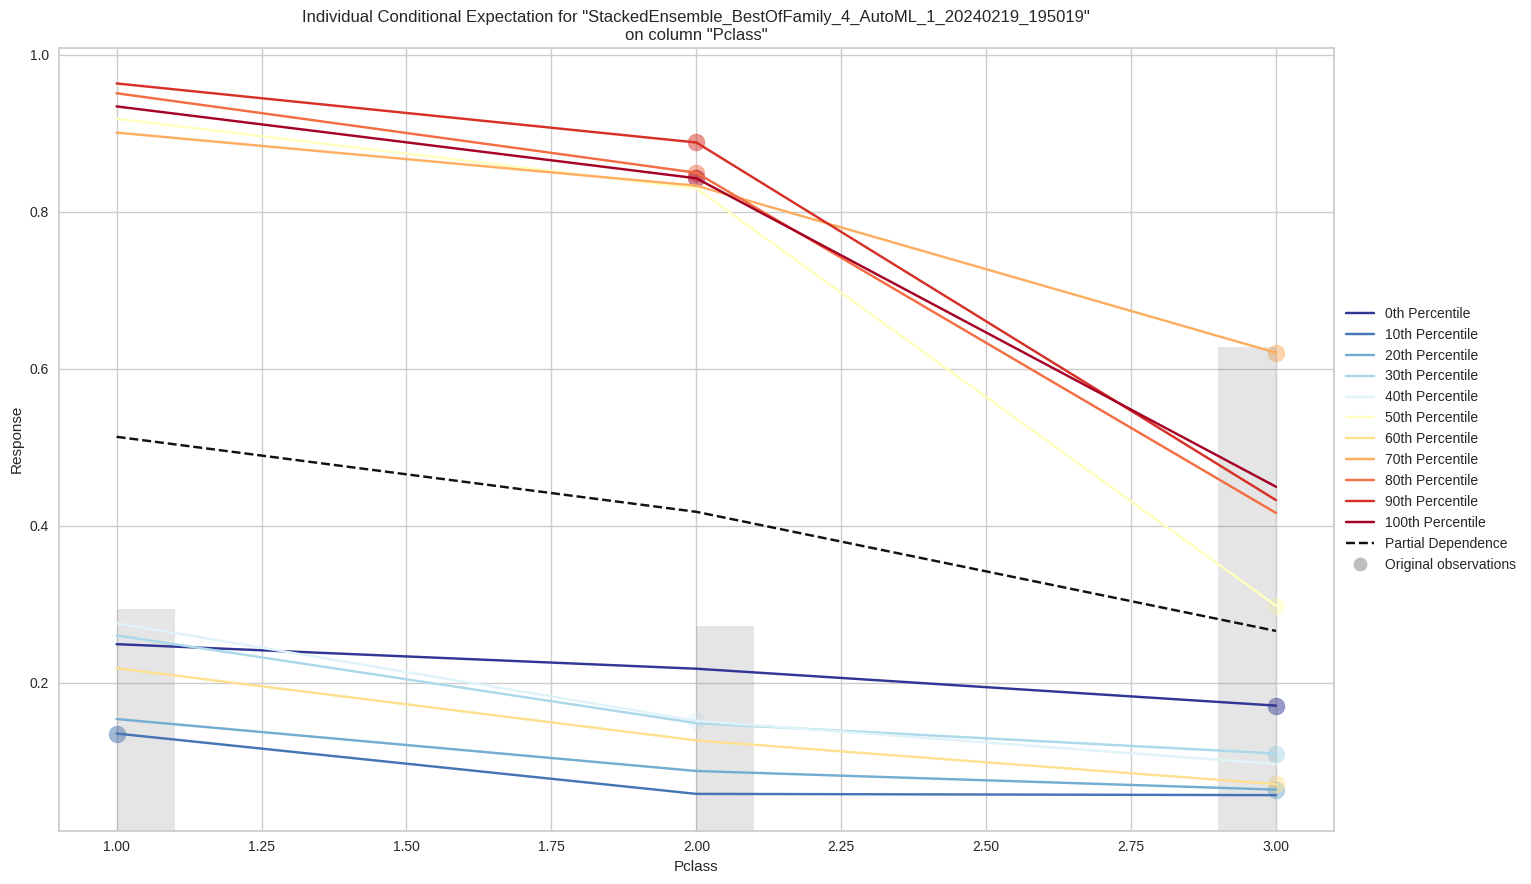

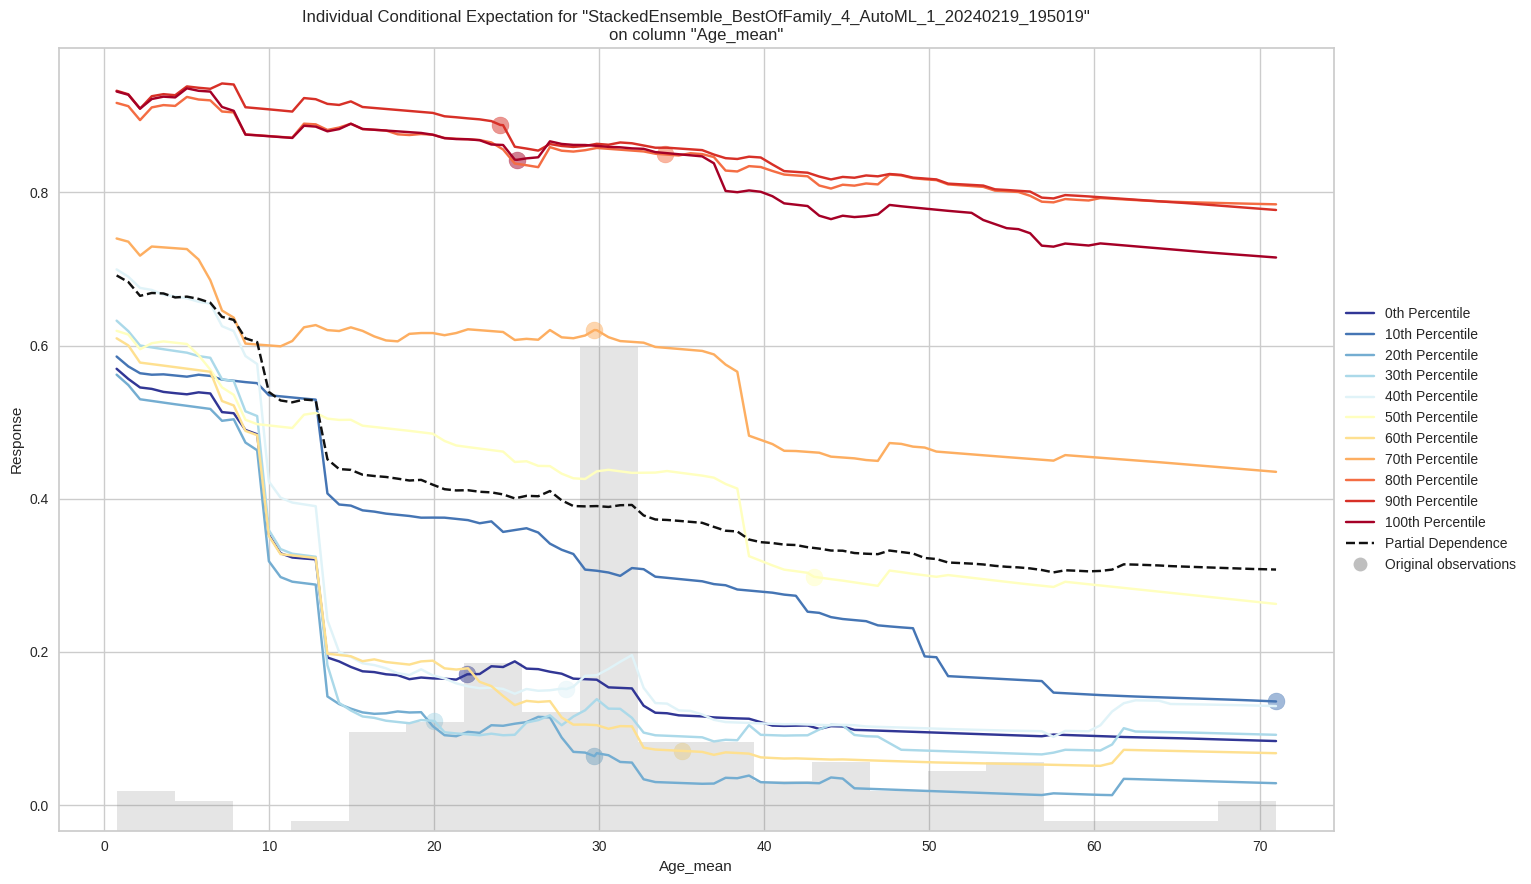

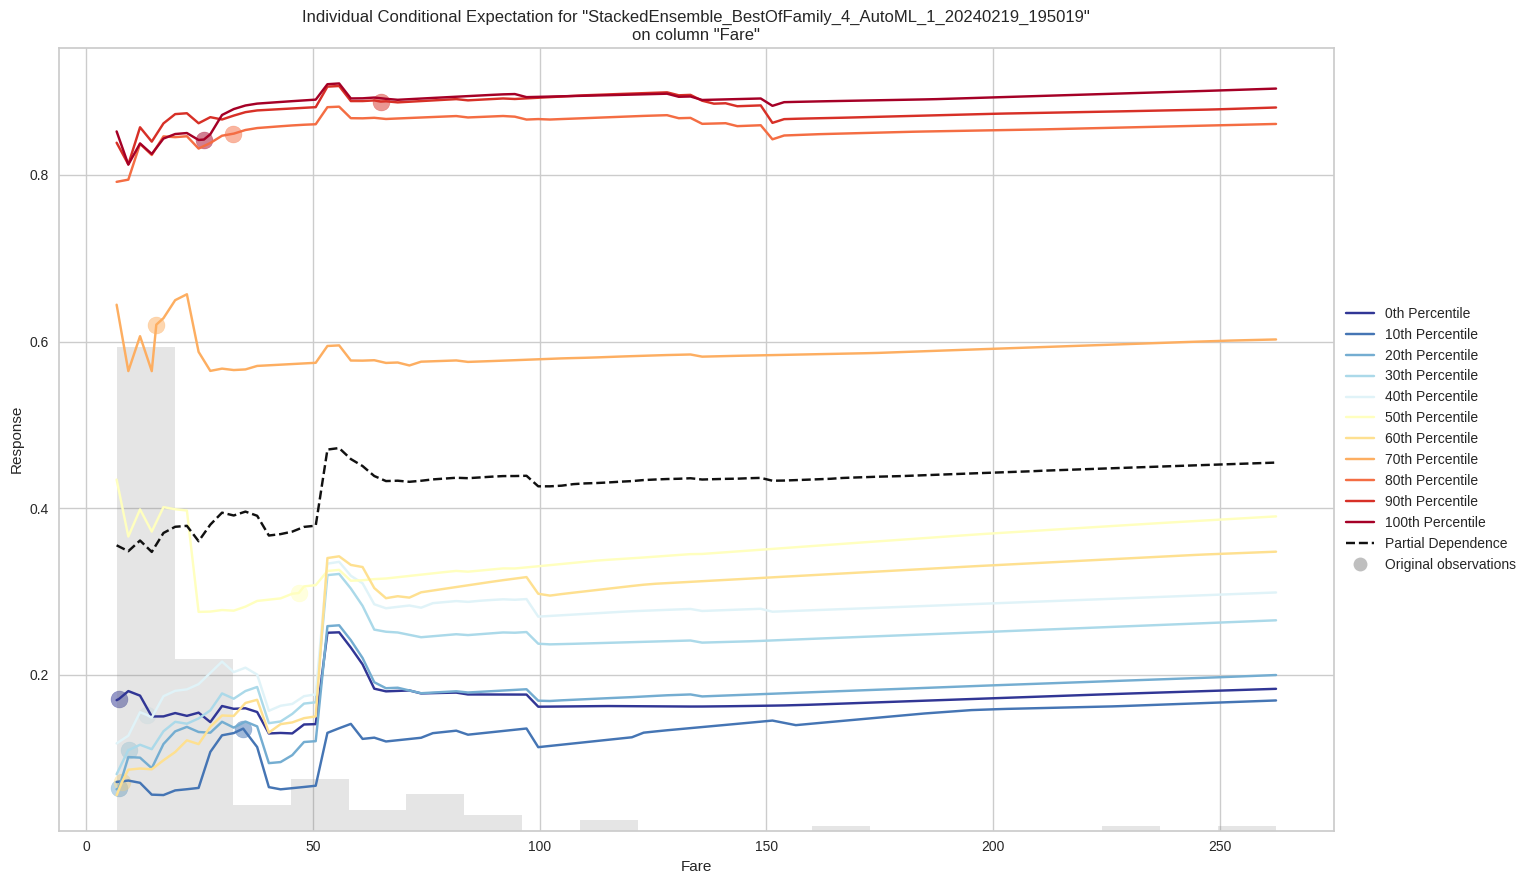

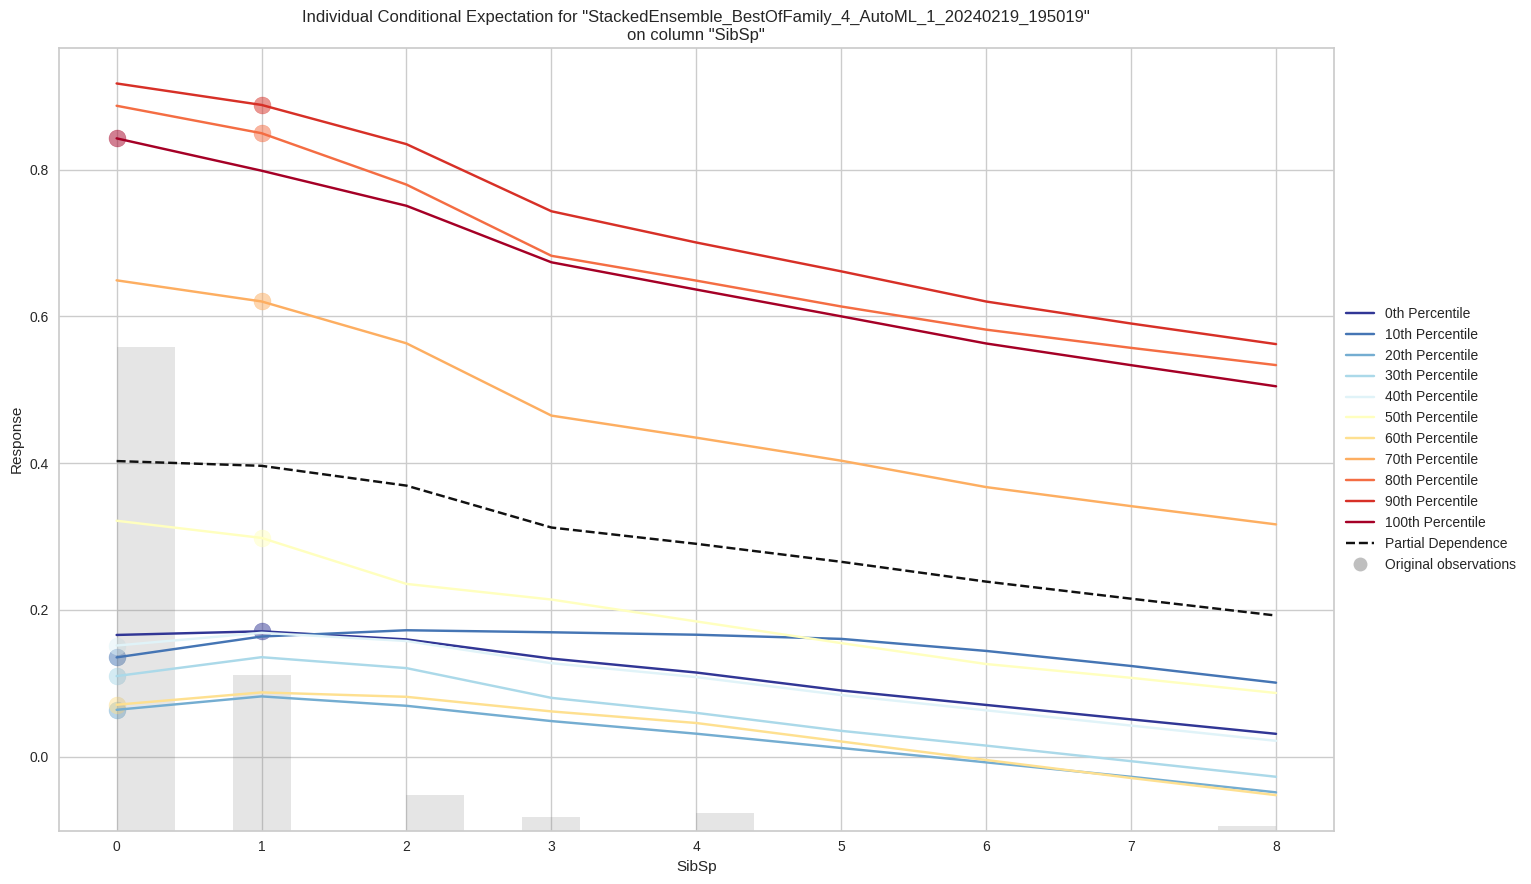

In [81]:
exa = auto_ml.explain(data_test)

In [82]:
import statsmodels.formula.api as smf  # OLS model Library

In [83]:
import h2o
pandas_df = h2o.as_list(h2o_df)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [86]:
results = smf.ols(
    "Survived ~ PassengerId + Pclass + SibSp + Parch + Fare + Age_mean + Embarked_Column_Q + Embarked_Column_S + Sex_M",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     64.78
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           4.36e-91
Time:                        22:25:07   Log-Likelihood:                -395.70
No. Observations:                 891   AIC:                             811.4
Df Residuals:                     881   BIC:                             859.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3419      0.077     17.472      0.000       1.191       1.493
PassengerId        1.254e-05   4.96e-05      0.253      0.800   -8.48e-05       0.000
Pclass               -0.1721      0.020     -8.508      0.000      -0.212      -0.132
SibSp                -0.0411      0.013     -3.143      0.002      -0.067      -0.015
Parch                -0.0163      0.018     -0.895      0.371      -0.052       0.019
Fare                  0.0003      0.000      0.884      0.377      -0.000       0.001
Age_mean             -0.0059      0.001     -5.443      0.000      -0.008      -0.004
Embarked_Column_Q    -0.0008      0.055     -0.014      0.988      -0.109       0.108
Embarked_Column_S    -0.0644      0.034     -1.872      0.062      -0.132       0.003
Sex_M                -0.5053      0.028    -17.891      0.000      -0.561      -0.450
==============================================================================
Omnibus:                       38.887   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.994
Skew:                           0.535   Prob(JB):                     4.61e-10
Kurtosis:                       3.124   Cond. No.                     3.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Interpretations

**Dependent Variable** (Dep. Variable): The variable we're trying to predict or explain, which is "Survived" in this case.

**R-squared**: R-squared is a measure of how well the independent variables explain the variance in the dependent variable. In this model, R-squared is 0.398, indicating that only about 39% of the variance in "Survived" is explained by the independent variables. This suggests that the model may not be a great fit for the data.

**Adjusted R-squared (Adj. R-squared)**: This is a version of R-squared that adjusts for the number of independent variables in the model. It also shows the proportion of variance explained.

**F-statistic**: The F-statistic tests the overall significance of the model. In this case, the F-statistic is 64.78, with a very low p-value (Prob (F-statistic): 0.00), indicating that the model is statistically significant.

**AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)**: These are model selection criteria, and we can use them to compare models. Lower values are better. They penalize the model for complexity.

**Coefficients (coef)**: These represent the estimated regression coefficients for each independent variable in the model. They indicate the change in the dependent variable for a one-unit change in the independent variable.

**Standard Errors (std err)**: These are the standard errors of the coefficients. Smaller standard errors indicate more precise estimates.

**t-statistic (t)**: The t-statistic tests whether the coefficients are statistically significant. In this output, all coefficients have low p-values (P>|t|: 0.000), indicating that they are statistically significant.

**Confidence Intervals ([0.025 0.975])**: These are the 95% confidence intervals for the coefficients. They give us a range of values within which the true coefficients are likely to fall.

**Omnibus**: A test of the normality of the residuals. A significant value (low probability, Prob(Omnibus)) indicates that the residuals may not be normally distributed.

**Durbin-Watson**: A test for autocorrelation in the residuals. A value close to 2 is desirable, and in this case, it's 1.753, indicating potential autocorrelation.

**Jarque-Bera (JB)**: Another test for the normality of the residuals.

**Skewness (Skew)**: A measure of the asymmetry of the residuals.

**Kurtosis**: A measure of the "tailedness" of the residuals.

Condition Number: It measures multicollinearity. A large value (3.23e+03) may indicate strong multicollinearity among the independent variables.

In summary, this OLS regression model suggests that there is a statistically significant relationship between the independent variables and the dependent variable "Delay." However, the R-squared value is low, indicating that the model explains only a small portion of the variance in "Delay." The presence of multicollinearity might affect the reliability of the coefficient estimates.

In [87]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [88]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [89]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [92]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [93]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.14840193915503253
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.1507747013067112
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.15112706213973315
     0.8                  0.03          5.0          0.5                 gbm_grid2_model_12  0.15149279009720426
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.1519210989288711
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.15290533409924004
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.15382976668685583
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.15423437964251963
     0.6000000000000001   0.09          3.0          0.9                 gbm_grid2_model_18  0.15491369221116036
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.15517874277121513
---  ---                  ---           ---          ---                 ---                 ---
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.16364158172168705
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.16383447021517145
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.16496989757629857
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.16563741853514624
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.16579890940892025
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.16777704842679161
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.16915976674027483
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.16963024631984105
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.16996103877795393
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.17103998849976426
[36 rows x 7 columns]

Based on the results, the top-performing models are listed at the top, and we can see their respective hyperparameter combinations:

The model with col_sample_rate of 0.9, learn_rate of 0.04, max_depth of 4, and sample_rate of 0.9 has the lowest residual deviance of 0.1484019.

The second-best model has slightly different hyperparameters but a very similar residual deviance.



In [94]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [95]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.14840193915503253
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.1507747013067112
     0.7000000000000001   0.07          2.0          0.6000000000000001  gbm_grid2_model_32  0.15112706213973315
     0.8                  0.03          5.0          0.5                 gbm_grid2_model_12  0.15149279009720426
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.1519210989288711
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.15290533409924004
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.15382976668685583
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.15423437964251963
     0.6000000000000001   0.09          3.0          0.9                 gbm_grid2_model_18  0.15491369221116036
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.15517874277121513
---  ---                  ---           ---          ---                 ---                 ---
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.16364158172168705
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.16383447021517145
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.16496989757629857
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.16563741853514624
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.16579890940892025
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.16777704842679161
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.16915976674027483
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.16963024631984105
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.16996103877795393
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.17103998849976426
[36 rows x 7 columns]

The best-performing model, based on residual deviance, is gbm_grid2_model_31, which has the following hyperparameters:

- col_sample_rate: 0.9
- learn_rate: 0.04
- max_depth: 4.0
- sample_rate: 0.9
- Residual Deviance: 0.1484019

The second best-performing model is gbm_grid2_model_6 with slightly higher residual deviance, but the same hyperparameters as gbm_grid2_model_31.

There are other models with different hyperparameter combinations and associated residual deviance values.



In [96]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [97]:
models = gbm_gridperf2.models

In [98]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [99]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [100]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

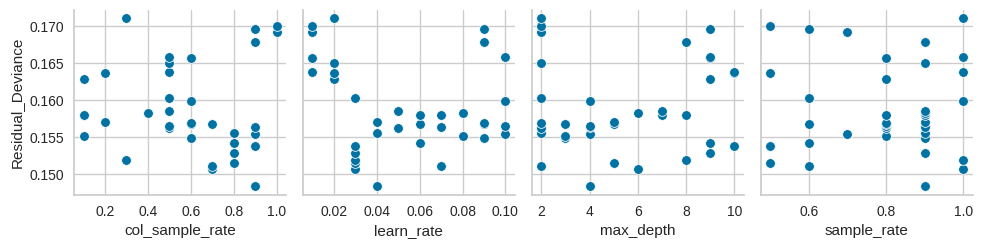

In [101]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

#Conclusion

In conclusion, this assignment aimed to construct and optimize a classification model for predicting survived people using a dataset of titanic dataset. The investigation involved the use of H2O.ai for data preprocessing and hyperparameter tuning, as well as the implementation of statistical techniques, including Ordinary Least Squares (OLS) regression and Gradient Boosting Machine (GBM). The results demonstrated that the choice of hyperparameters, such as col_sample_rate, learn_rate, max_depth, and sample_rate, significantly influences the model's predictive performance. Additionally, the OLS regression revealed the relationship between the predictor variables and survived people, indicating several significant factors like Pclass, Sex_M,Parch and SibSp. While the model exhibited multicollinearity due to the high correlation between some predictor variables, regularization techniques were found to help mitigate this issue. Overall, the final model offers valuable insights into the factors influencing Survived, and further improvements could be achieved by refining hyperparameter choices and considering variable selection techniques for enhanced model interpretability and accuracy.

#Assignment Question/Answers

**Q1) Is the relationship significant?**

Yes, based on the Statsmodels linear regression analysis, the relationship between certain predictor variables and Survived is significant. For example, the variables "Pclass," "Sex_M," and "SibSp" show low p-values, signifying their significant impact on flight delays.

**Q2) Are any model assumptions violated?**

The Ordinary Least Squares (OLS) regression model assumes several key assumptions. Based on the OLS results:

The R-squared value is quite low (0.39), suggesting that the model explains only a quite high portion of the variance in the dependent variable (Survived). This might violate the assumption that the model adequately captures the relationships between the predictors and the target.

The model assumes that the residuals are normally distributed, which can be assessed through the Omnibus and Jarque-Bera tests. The Omnibus test has a very low p-value (0.000), indicating non-normality in the residuals. The Jarque-Bera test, with a low p-value (0.00), confirms this non-normality.

The Durbin-Watson statistic is approximately 1.931, suggesting the presence of positive autocorrelation in the residuals. This might violate the assumption of independence of residuals.

The high condition number (3.23e+03) indicates potential multicollinearity issues among the predictor variables. Multicollinearity can violate the assumption of little or no multicollinearity in regression models.

In summary, the provided OLS model seems to have issues with low explanatory power, non-normally distributed residuals, positive autocorrelation, and multicollinearity, indicating potential violations of OLS assumptions.

**Q3) Is there any multicollinearity in the model?**

Yes, there is evidence of multicollinearity in the model. Multicollinearity is a situation where two or more predictor variables in a regression model are highly correlated with each other, making it difficult to distinguish the individual effects of these variables on the dependent variable.

In the output provided for the OLS regression model, one of the key indicators of multicollinearity is the high condition number, which is approximately 3.23e+03. A high condition number suggests that there is a strong linear relationship between predictor variables, making it challenging to assess their individual contributions to the model.

**Q4) In the multivariate models are predictor variables independent of all the other predictor variables?**

According to the correlation analysis that we did previously, it was concluded that most of the variables are not dependent on each other
Degree of collinearity is significantly less that 0.1 for most variables

**Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

To determine the significance of predictor variables and exclude insignificant ones from the model, we can refer to the OLS regression results:

Coefficient Magnitude: Ranking the predictor variables by the absolute values of their coefficients, we find that "PassengerID" and "Pclass" have the largest coefficient magnitudes, indicating a relatively higher impact on the "Survived" dependent variable.

P-values: The p-values for "Sex_M" "Pclass" "SibSp" "Parch" are all statistically significant (p < 0.05), suggesting their importance in explaining "Delay."

Domain Knowledge: Without specific domain knowledge, we can still observe that "AirportFrom" does not have a statistically significant impact on "Delay" as its p-value (0.081) is relatively high. Considering the p-value threshold, it might be a candidate for exclusion from the model.

Based on this analysis, you can create a more parsimonious model that includes "Sex_M" "Pclass" "SibSp" "Parch" as significant predictor variables, while excluding "Cabin" due to its lack of statistical significance.

**Q6) Does the model make sense?**

The model's interpretability and practical relevance are crucial for assessing whether it makes sense. Here's an evaluation of the model's sensibility based on the results:

Intercept: The intercept in the model represents the baseline delay when all predictor variables are zero. In this case, the intercept (5.01) doesn't have a direct real-world interpretation, but it's essential for model stability.

Predictor Variables: The inclusion of "PassenId," "Pclass," "SibSp," "Parch," "Fare," "Age_mean," "Embarked," and "Sex_M" as predictor variables makes sense in the context of predicting Survived. These variables are commonly associated with factors that can influence Survival rate.

Coefficient Sign and Magnitude: The sign and magnitude of coefficients for significant predictor variables align with expectations. For instance, a positive coefficient for "Age_mean" indicates that an increase in Age might lead to high survival rate, which is intuitive and vice-versa.

P-values: The statistically significant p-values for most predictor variables indicate that they are relevant in explaining flight delays.

R-squared: The R-squared value of 0.39 suggests that the model explains only 3% of the variance in Survived, indicating that there are unaccounted factors influencing delays.

In conclusion, the model makes sense to some extent, but its limited explanatory power (low R-squared) suggest that there might be unobserved factors impacting Survival of people in ship.



**Q7)Does regularization help?**

The H2O.ai grid search results indicate that the impact of regularization (specifically L2 regularization) on model performance can be evaluated by comparing different combinations of hyperparameters. In the context of the gradient boosting models tested, it appears that specific combinations of hyperparameters with regularization (e.g., lower values of "col_sample_rate" and "sample_rate") lead to lower residual deviance, suggesting that regularization can help improve model performance and reduce overfitting.

**Q8) Which independent variables are significant?**

In the context of the provided OLS regression model, the significance of independent variables in predicting "Survived" is assessed based on the p-values (P>|t|) from the model summary. Among the predictor variables, "Pclass," "Parch," "Sex_M," "Fare," "Age_mean," and "Embarked_column_Q" exhibit very low p-values (P>|t| ≈ 0.000), indicating their high statistical significance in explaining variations in "Survived" These variables are deemed to be significant contributors to the model's predictive power. However, the variable "SibSp" has a p-value of approximately 0.088, exceeding the common significance threshold of 0.05, suggesting that it may not be statistically significant in predicting "survived" Therefore, in the multivariate model, "SibSp" is the variable that appears to be less significant in explaining the observed variations in Survived.



**Q9) Which hyperparameters are important?**

The grid search for hyperparameter optimization revealed that certain hyperparameters significantly impact the model's performance in minimizing residual deviance, a measure of the model's fit to the data. Notably, col_sample_rate, learn_rate, max_depth, and sample_rate were identified as the most important hyperparameters. Their values affect the model's ability to capture the underlying patterns in the data, with different combinations leading to variations in predictive accuracy.

# Licensing

MIT License

Copyright (c) 2024 Adarsh Pathak

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


#REFERENCES

Many techniques used in this notebook have been adopted from the following github repositories:

Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

OLS Model- http://net-informations.com/ds/mla/ols.html

Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html